In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
%pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pd.set_option('display.max_columns', 500)

In [8]:
transaction = pd.read_csv('synthetic_fraud_data.csv')
transaction.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,medium,Platinum Credit,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,medium,Platinum Credit,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,medium,Platinum Credit,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,medium,Premium Debit,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,medium,Basic Debit,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [9]:
## Identify transaction data's information
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud             bool   
dty

In [10]:
transaction.describe()

,card_number,amount,distance_from_home,transaction_hour
count,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06
mean,4.222100e+15,4.792468e+04,3.220519e-01,1.215467e+01
std,2.341170e+15,1.775562e+05,4.672628e-01,6.536767e+00
min,3.700086e+14,1.000000e-02,0.000000e+00,0.000000e+00
25%,4.004400e+15,3.635300e+02,0.000000e+00,7.000000e+00
50%,5.010745e+15,1.177450e+03,0.000000e+00,1.200000e+01
75%,5.999914e+15,2.242953e+04,1.000000e+00,1.800000e+01
max,6.999728e+15,6.253153e+06,1.000000e+00,2.300000e+01


In [11]:
print(transaction.shape)

(7483766, 24)


In [12]:
transaction_sample = transaction.sample(n = 250000, random_state = 21).reset_index(drop = True)

In [13]:
transaction_sample.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_b5b17800,CUST_46478,5699657752967952,2024-10-07 17:14:22.181495+00:00,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,False,Firefox,web,ce7db67743bf5fffdfa5b2ecfb4e6de0,140.170.128.51,0,True,17,False,"{'num_transactions': 27, 'total_amount': 25271...",False
1,TX_9c391f0e,CUST_49102,371384150413036,2024-10-16 14:20:16.817017+00:00,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,False,Chrome,web,d654a7f29023652d55a4574b8fc6ea4a,45.93.44.23,0,False,14,False,"{'num_transactions': 437, 'total_amount': 1567...",False
2,TX_c006b556,CUST_60071,379239643871947,2024-10-30 16:30:10.768556+00:00,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,False,Safari,web,6d945d3387a7d9eb150ec7d30bd3d621,52.255.14.155,0,True,16,False,"{'num_transactions': 6, 'total_amount': 340463...",False
3,TX_1ec4e8e0,CUST_85188,6915403402912841,2024-10-03 08:21:32.928515+00:00,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,False,Edge,web,4af6ed569634c7b9311dc6968b50e29e,65.194.56.96,1,False,8,False,"{'num_transactions': 944, 'total_amount': 2583...",True
4,TX_6b0f6cba,CUST_12828,376941479073646,2024-10-08 22:41:26.566924+00:00,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,False,Firefox,web,fcaf3544fe07e389572c90dc02921857,193.111.77.221,0,False,22,False,"{'num_transactions': 148, 'total_amount': 2367...",False


In [14]:
## Drop PII that might be unncessary in performing further regression task
transaction_sample.drop(['transaction_id', 'customer_id', 'card_number', 'ip_address', 'device_fingerprint'], axis = 1, inplace = True)

In [15]:
## Convert Boolean values into int 
boolean_dtype = transaction_sample.select_dtypes('boolean').columns
for boolean_col in boolean_dtype:
    transaction_sample[boolean_col] = transaction_sample[boolean_col].astype('int')

In [16]:
## Convert timestamp column into different data type
transaction_sample['timestamp'] = pd.to_datetime(transaction_sample['timestamp'], format='ISO8601')

In [17]:
## Extract velocity last hour column values
import ast

# Parse all entries in 'velocity_last_hour' column once
parsed_data = []
for value in transaction_sample['velocity_last_hour']:
    try:
        # Parse each value as a dictionary
        parsed_data.append(ast.literal_eval(value) if isinstance(value, str) else value)
    except (ValueError, SyntaxError):
        # In case of parsing error, append a default dictionary with None values
        parsed_data.append({
            'num_transactions': None,
            'total_amount': None,
            'unique_merchants': None,
            'unique_countries': None,
            'max_single_amount': None
        })

# Convert parsed data to columns
transaction_sample['num_transactions'] = [int(item.get('num_transactions', 0)) for item in parsed_data]
transaction_sample['total_amount'] = [float(item.get('total_amount', 0)) for item in parsed_data]
transaction_sample['unique_merchants'] = [int(item.get('unique_merchants', 0)) for item in parsed_data]
transaction_sample['unique_countries'] = [int(item.get('unique_countries', 0)) for item in parsed_data]
transaction_sample['max_single_amount'] = [float(item.get('max_single_amount', 0)) for item in parsed_data]

# Drop velocity_last_hour column
transaction_sample.drop('velocity_last_hour', axis = 1, inplace = True)

In [18]:
## Extract year, month, day, etc.
def modify_timestamp():
    transaction_sample['year'] = transaction_sample['timestamp'].dt.year
    transaction_sample['month'] = transaction_sample['timestamp'].dt.month
    transaction_sample['day'] = transaction_sample['timestamp'].dt.day
    transaction_sample['hour'] = transaction_sample['timestamp'].dt.hour
    transaction_sample['minute'] = transaction_sample['timestamp'].dt.minute
    transaction_sample['second'] = transaction_sample['timestamp'].dt.second
    transaction_sample['microsecond'] = transaction_sample['timestamp'].dt.microsecond
    transaction_sample.drop('timestamp', axis = 1, inplace = True)

modify_timestamp()

In [19]:
transaction_sample.head()

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond
0,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,0,Firefox,web,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495
1,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,0,Chrome,web,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017
2,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,0,Safari,web,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556
3,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,0,Edge,web,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515
4,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,0,Firefox,web,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924


In [20]:
transaction_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   merchant_category    250000 non-null  object 
 1   merchant_type        250000 non-null  object 
 2   merchant             250000 non-null  object 
 3   amount               250000 non-null  float64
 4   currency             250000 non-null  object 
 5   country              250000 non-null  object 
 6   city                 250000 non-null  object 
 7   city_size            250000 non-null  object 
 8   card_type            250000 non-null  object 
 9   card_present         250000 non-null  int64  
 10  device               250000 non-null  object 
 11  channel              250000 non-null  object 
 12  distance_from_home   250000 non-null  int64  
 13  high_risk_merchant   250000 non-null  int64  
 14  transaction_hour     250000 non-null  int64  
 15  weekend_transacti

In [22]:
#EDA
# Select only int or float valued columns
numerical_cols = transaction_sample.select_dtypes(include = ['int', 'float']).columns

# Remove those boolean valued columns converted into int & date related fields
numerical_cols = numerical_cols.drop([
    'card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction', 'is_fraud', 'year', 'month', 'day', 'hour', 'minute', 'second',
    'microsecond'
])

In [23]:
transaction_sample['amount']

0            169.37
1            823.67
2          21948.66
3           1602.46
4             89.80
            ...    
249995    513136.06
249996       925.19
249997       425.03
249998        27.31
249999    177666.12
Name: amount, Length: 250000, dtype: float64

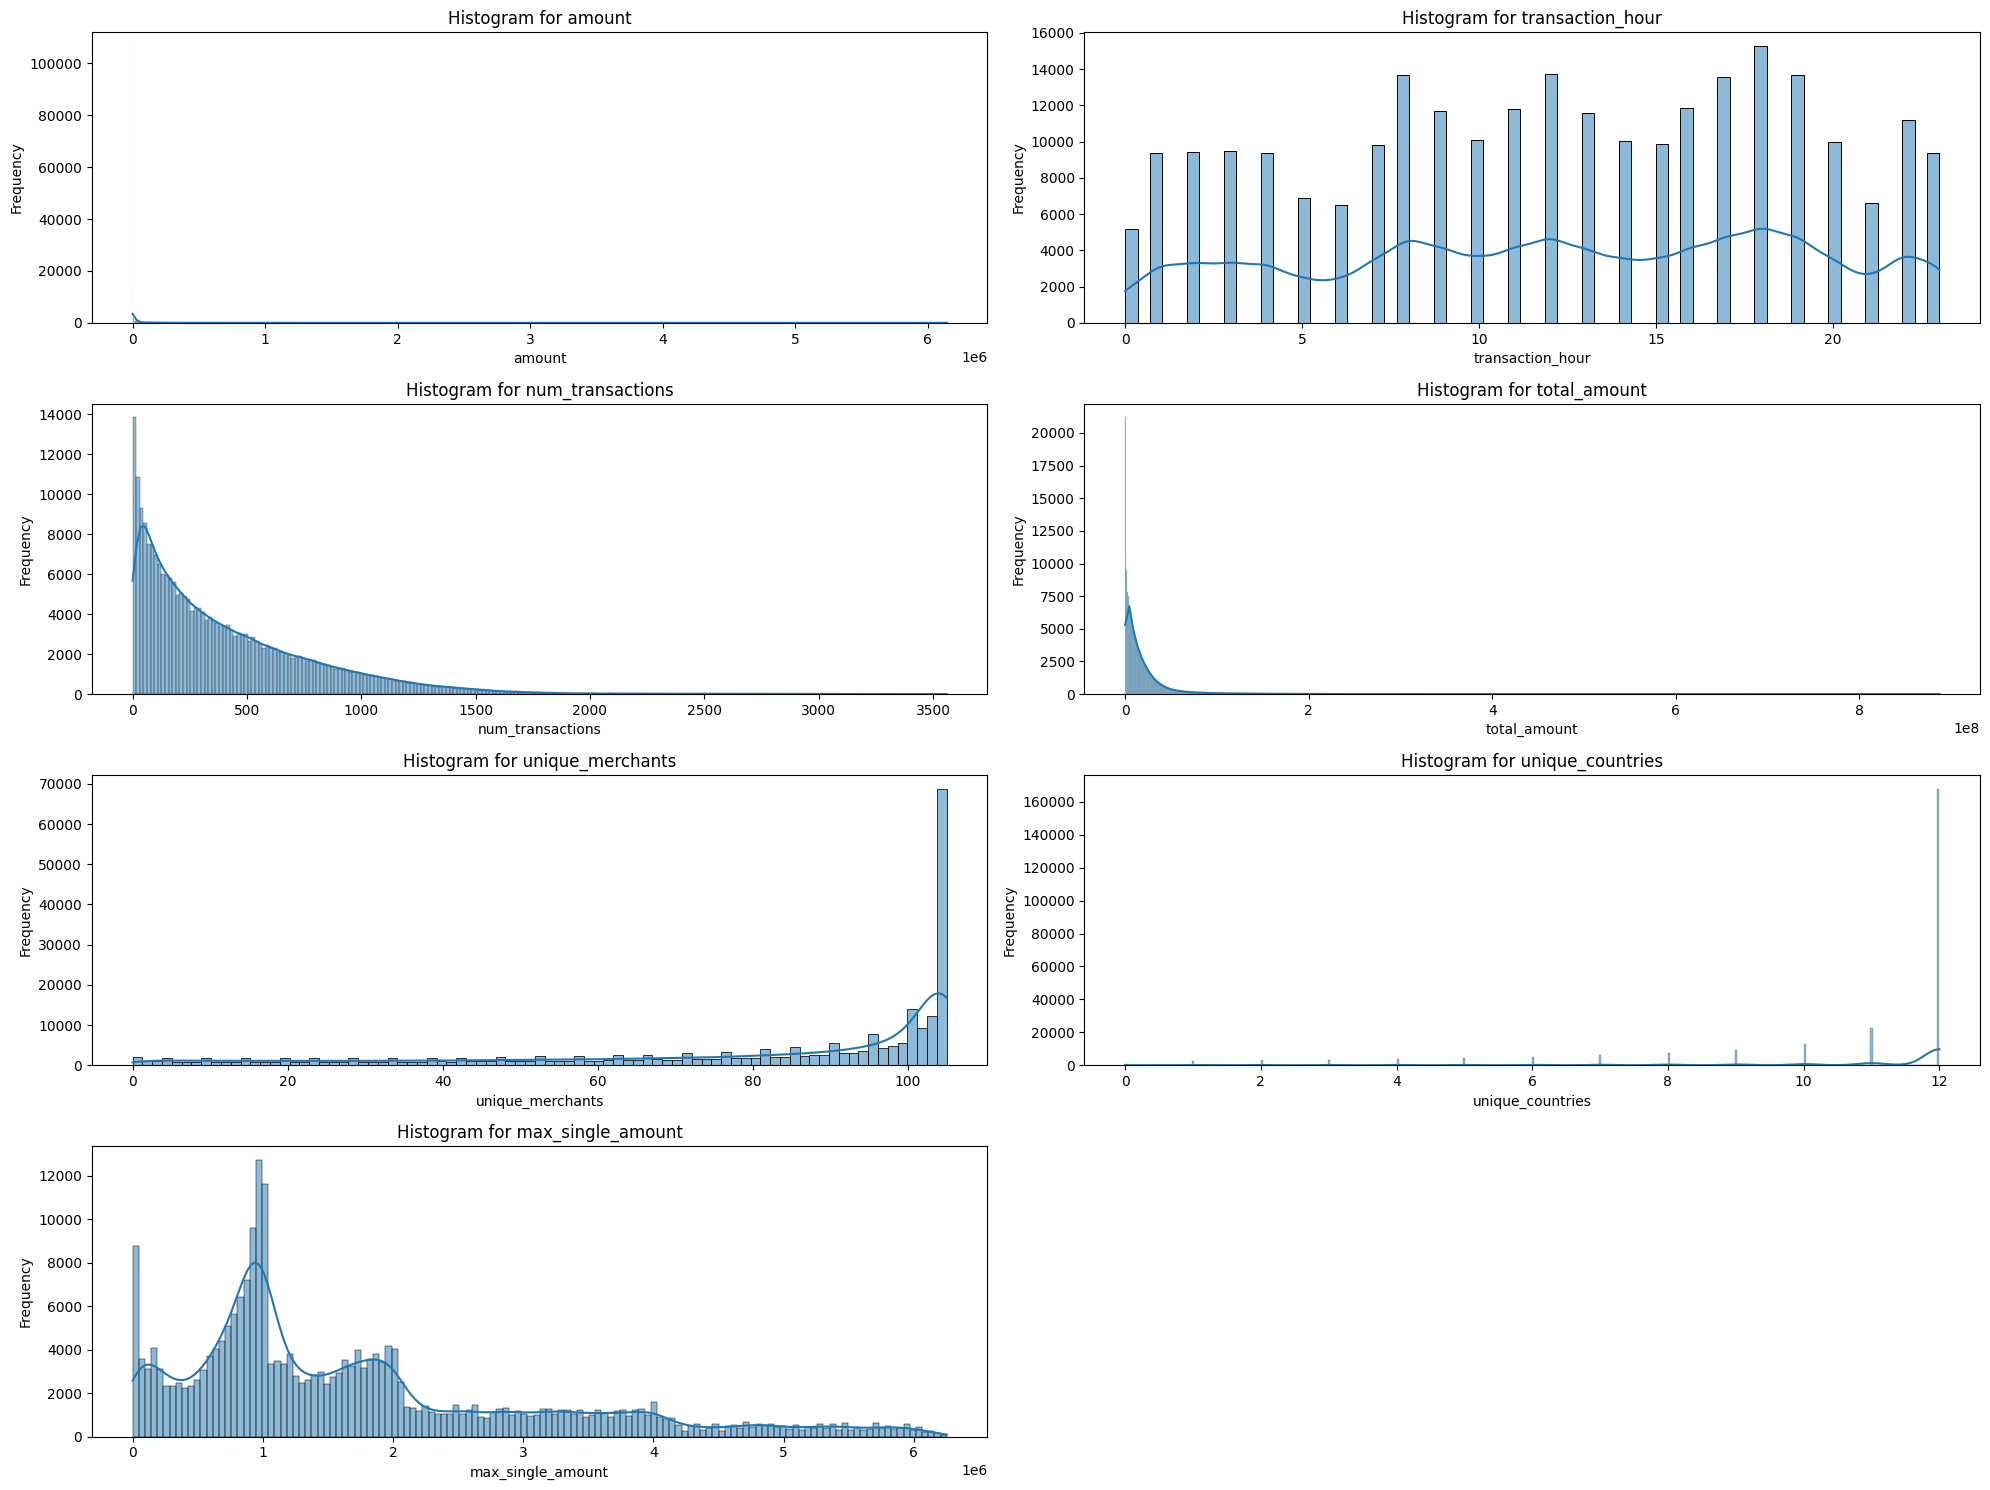

In [24]:
# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(numerical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(numerical_cols):
    sns.histplot(data=transaction_sample, x=col, ax=axes[i], kde = True)
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

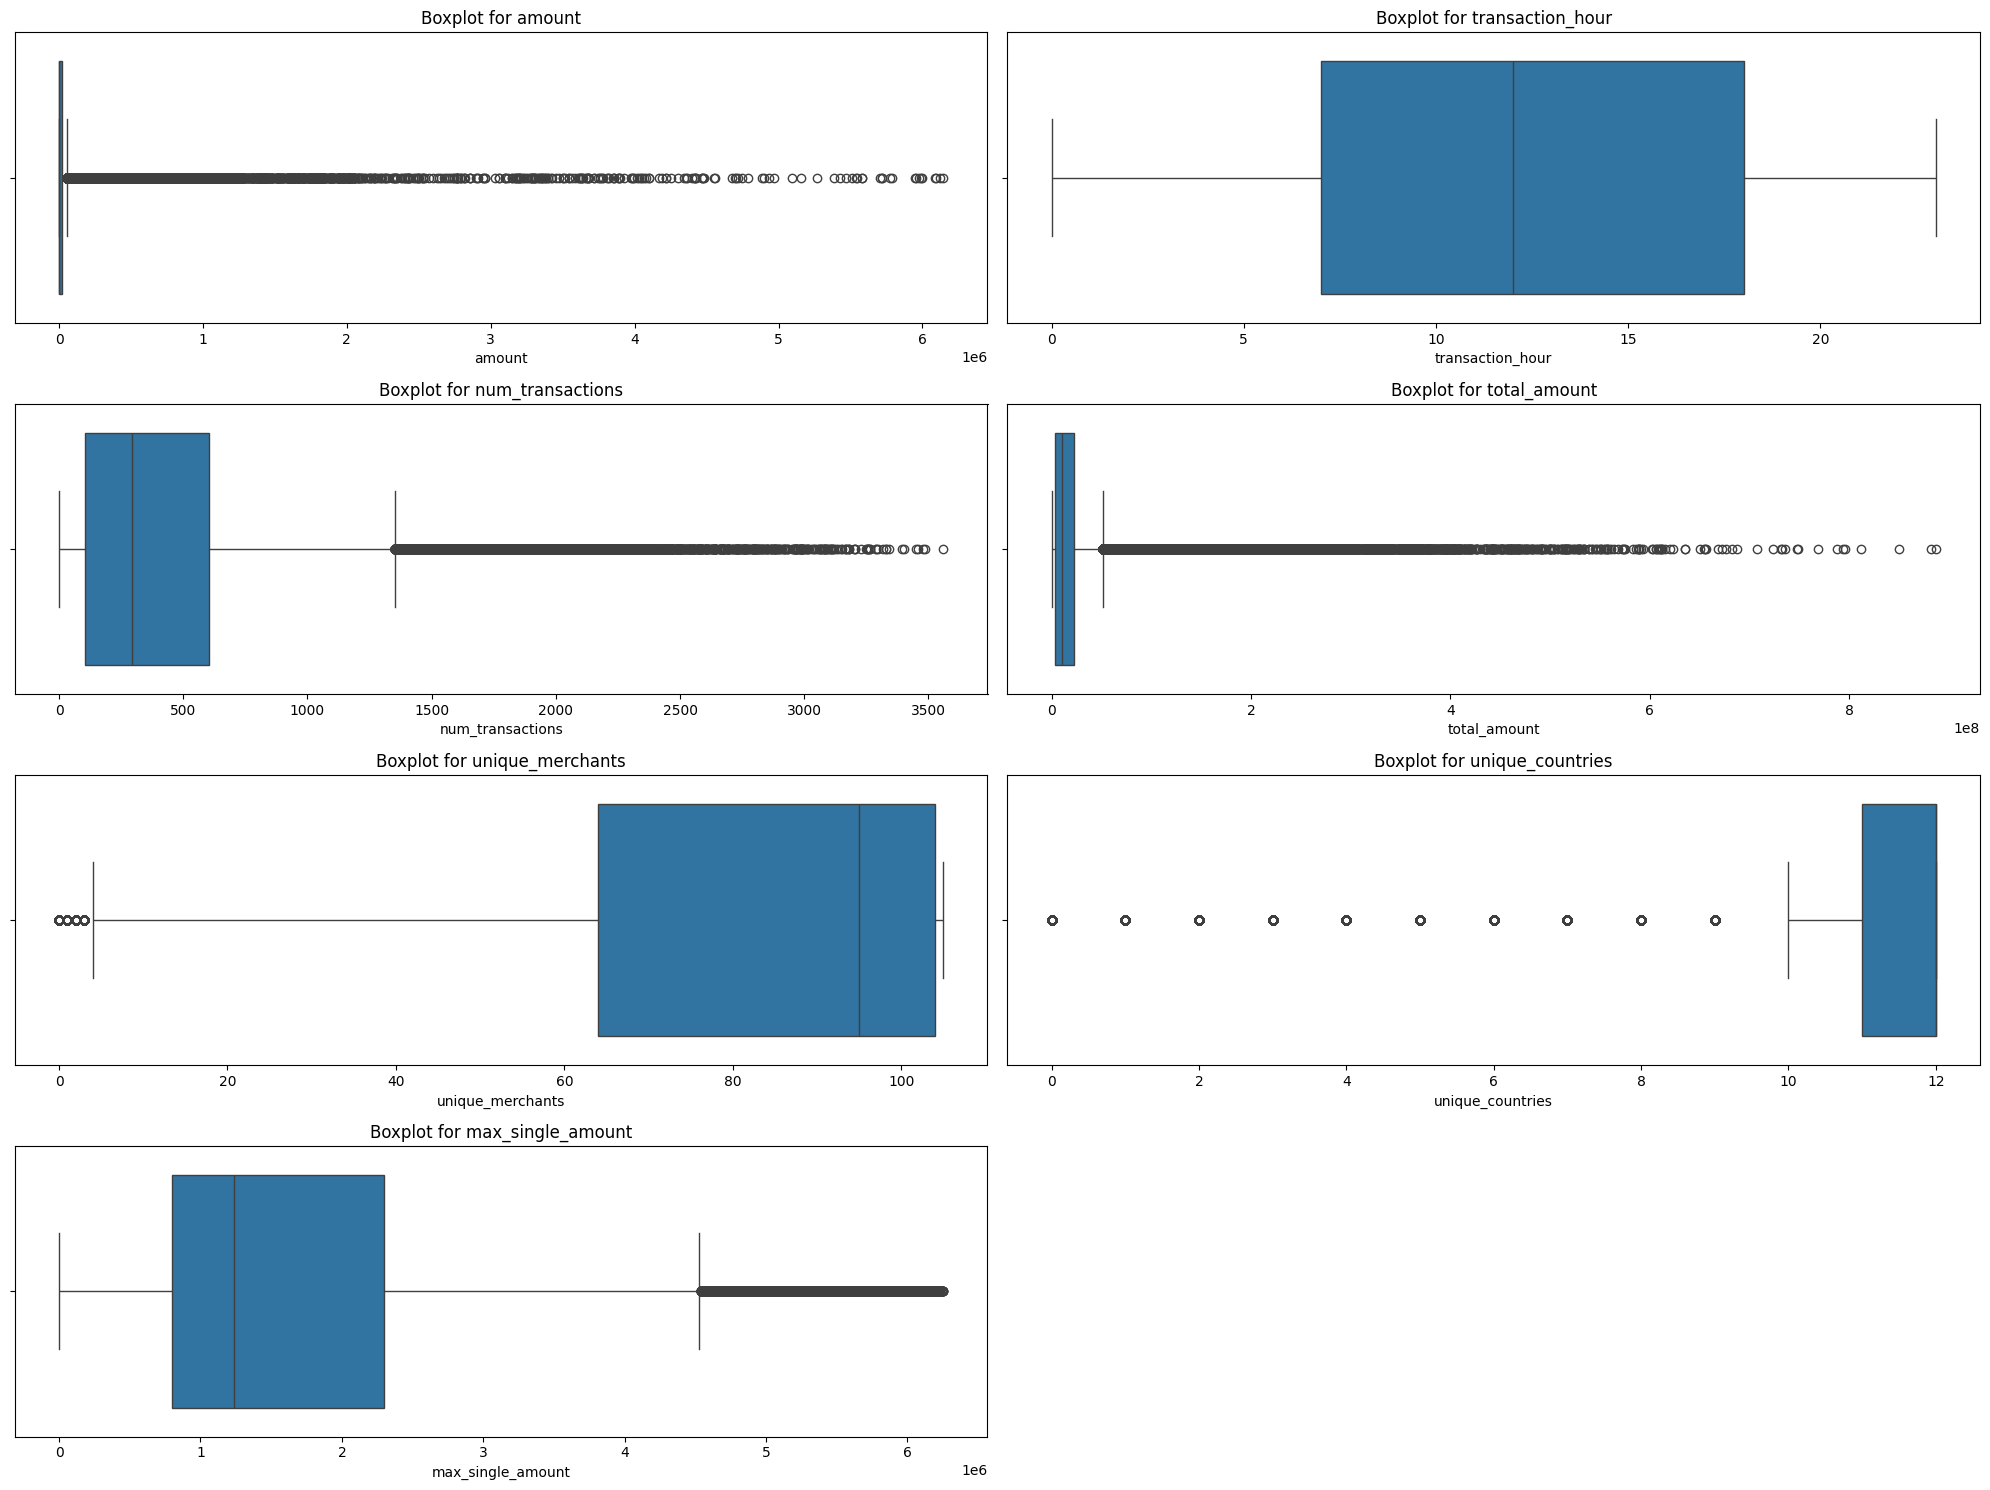

In [25]:
# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(numerical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=transaction_sample, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
def check_outliers():
    for col in numerical_cols:
        q1 = transaction_sample[col].quantile(0.25)
        q3 = transaction_sample[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        outlier_count = len(transaction_sample[(transaction_sample[col] > upper) | (transaction_sample[col] < lower)])
        print(f'Outlier Count for {col} : {outlier_count}')

check_outliers()

Outlier Count for amount : 38262
Outlier Count for transaction_hour : 0
Outlier Count for num_transactions : 6907
Outlier Count for total_amount : 18546
Outlier Count for unique_merchants : 4074
Outlier Count for unique_countries : 46363
Outlier Count for max_single_amount : 15286


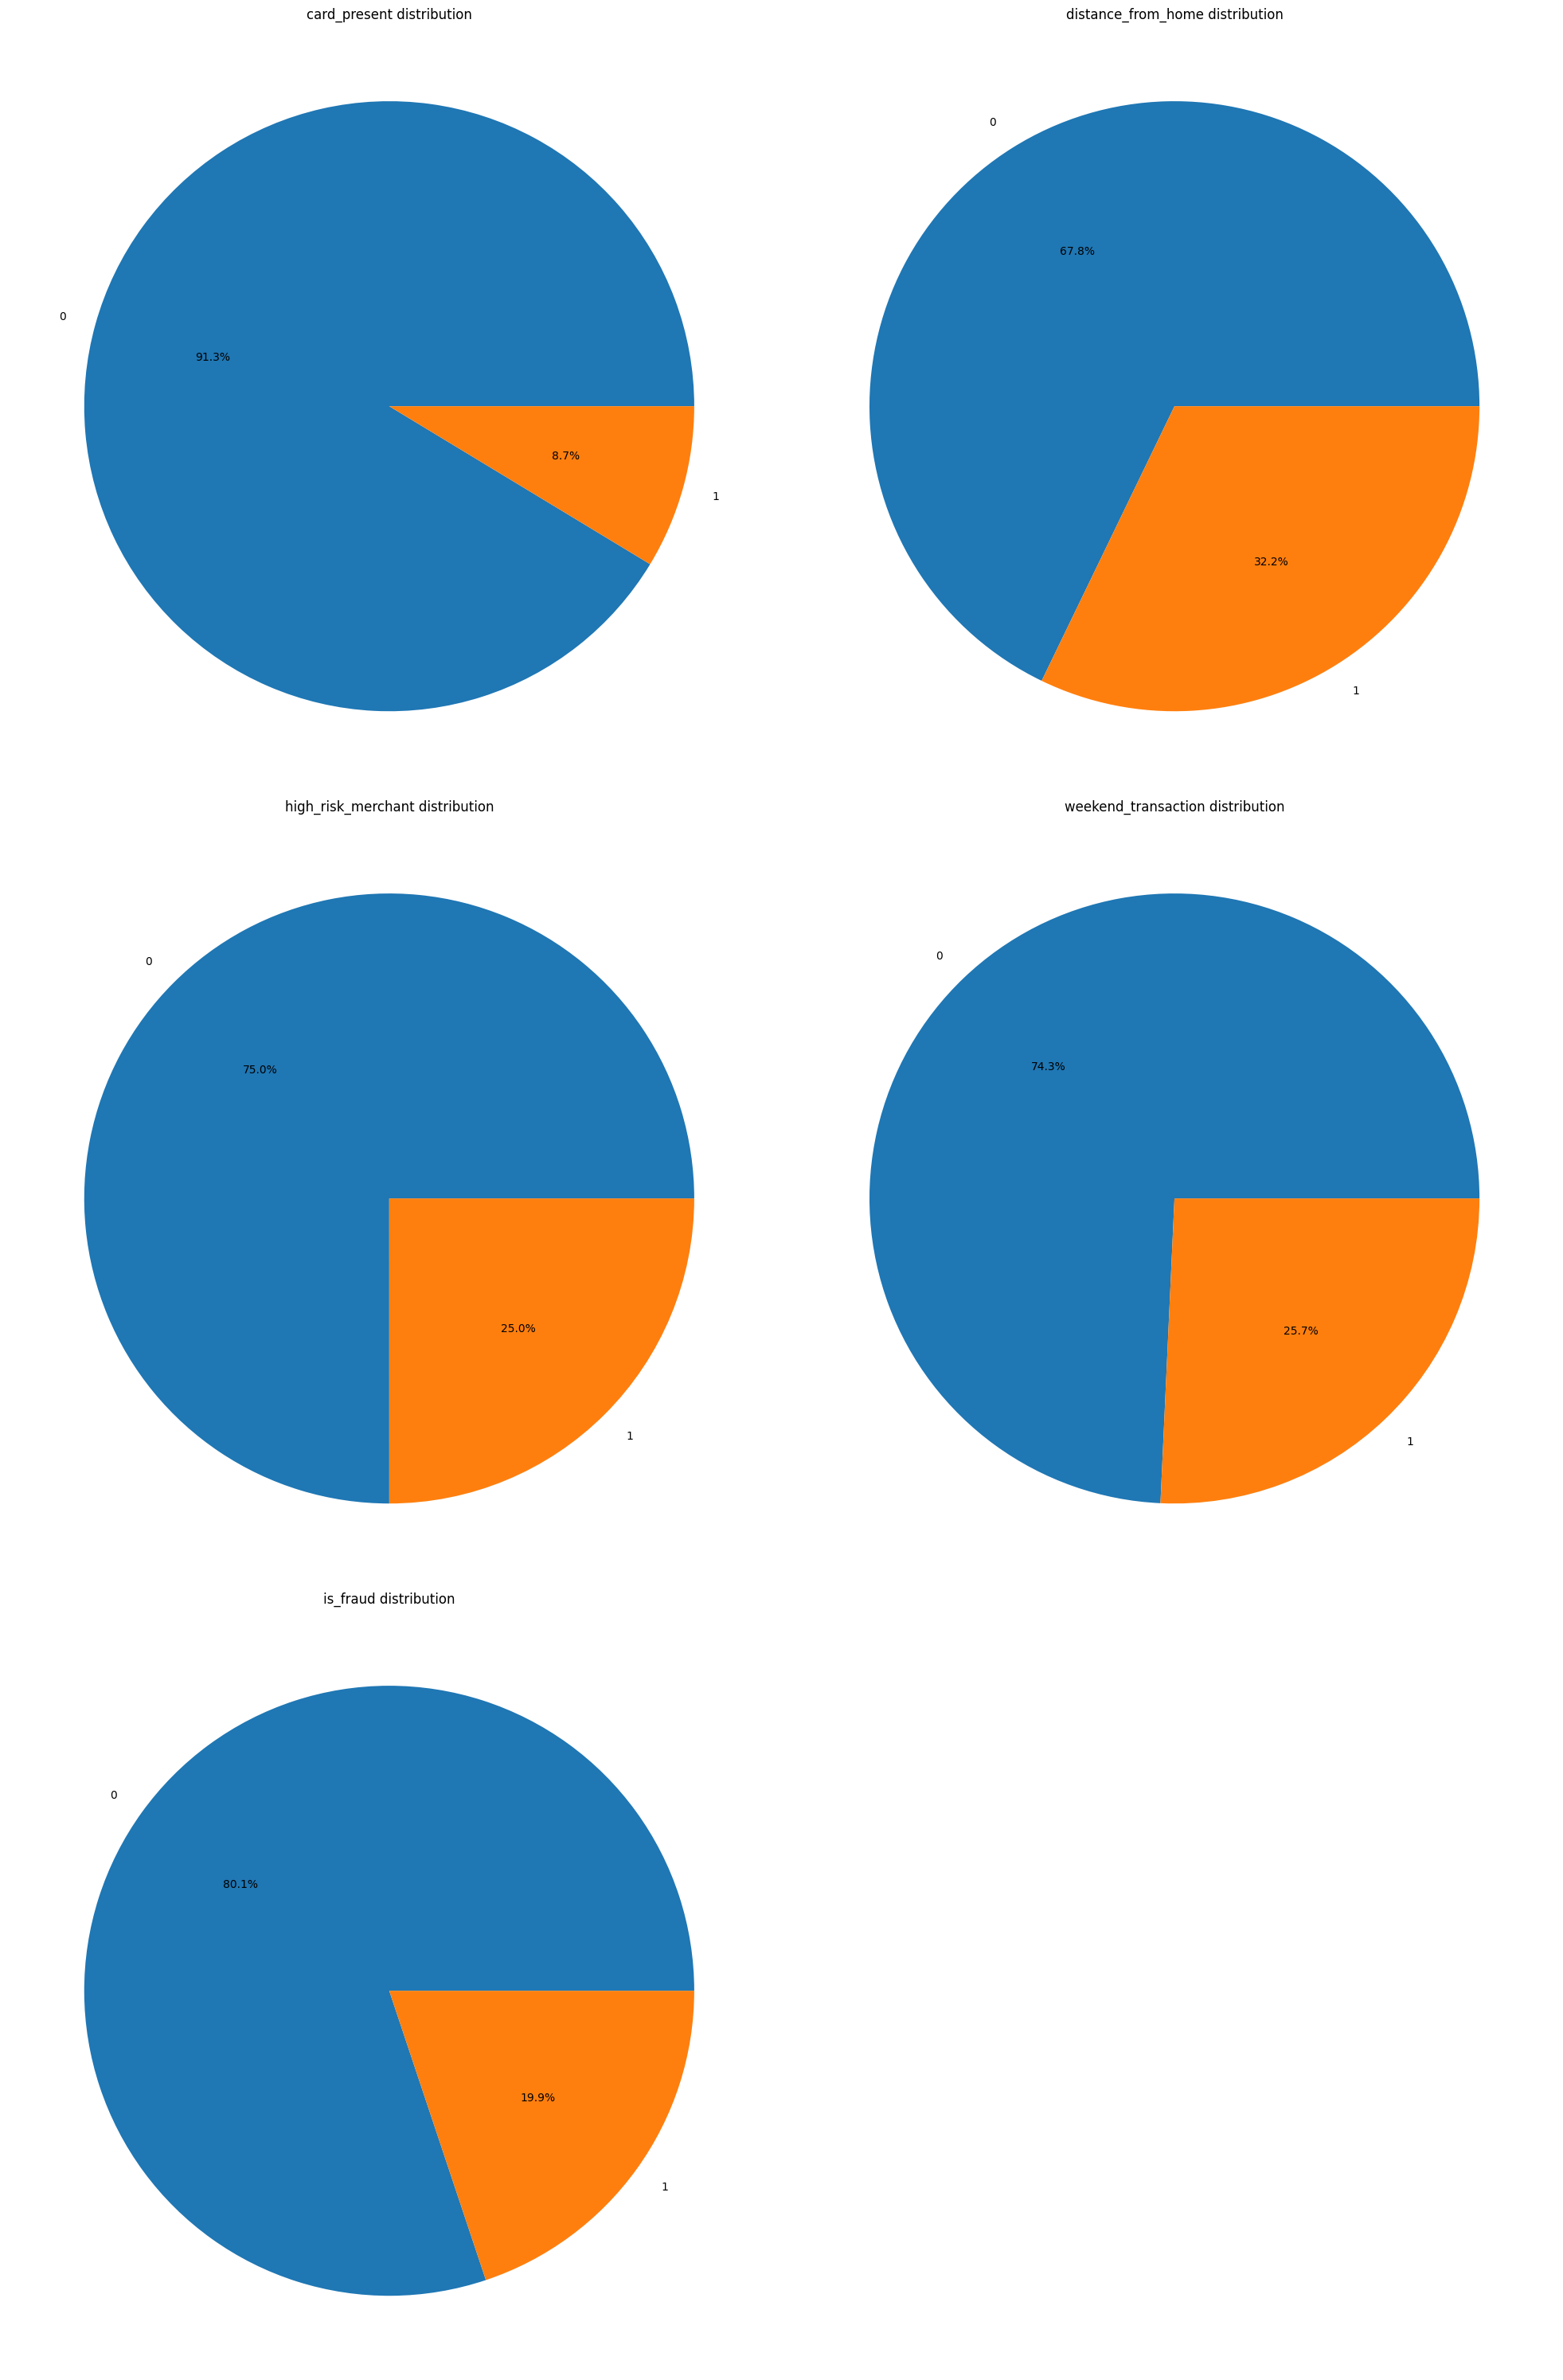

In [27]:
binary_cols = ['card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction', 'is_fraud']

# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(binary_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 30))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(binary_cols):
    value_counts = transaction_sample[col].value_counts(normalize=True)
    value_counts.plot.pie(ax=axes[i], autopct='%1.1f%%')  
    axes[i].set_title(f'{col} distribution')
    axes[i].set_ylabel('')  

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [28]:
# Get the name of entire categorical features
categorical_cols = list(transaction_sample.select_dtypes('object').columns)
categorical_cols.extend(['card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction'])
categorical_cols.remove('merchant')
categorical_cols

['merchant_category',
 'merchant_type',
 'currency',
 'country',
 'city',
 'city_size',
 'card_type',
 'device',
 'channel',
 'card_present',
 'distance_from_home',
 'high_risk_merchant',
 'weekend_transaction']

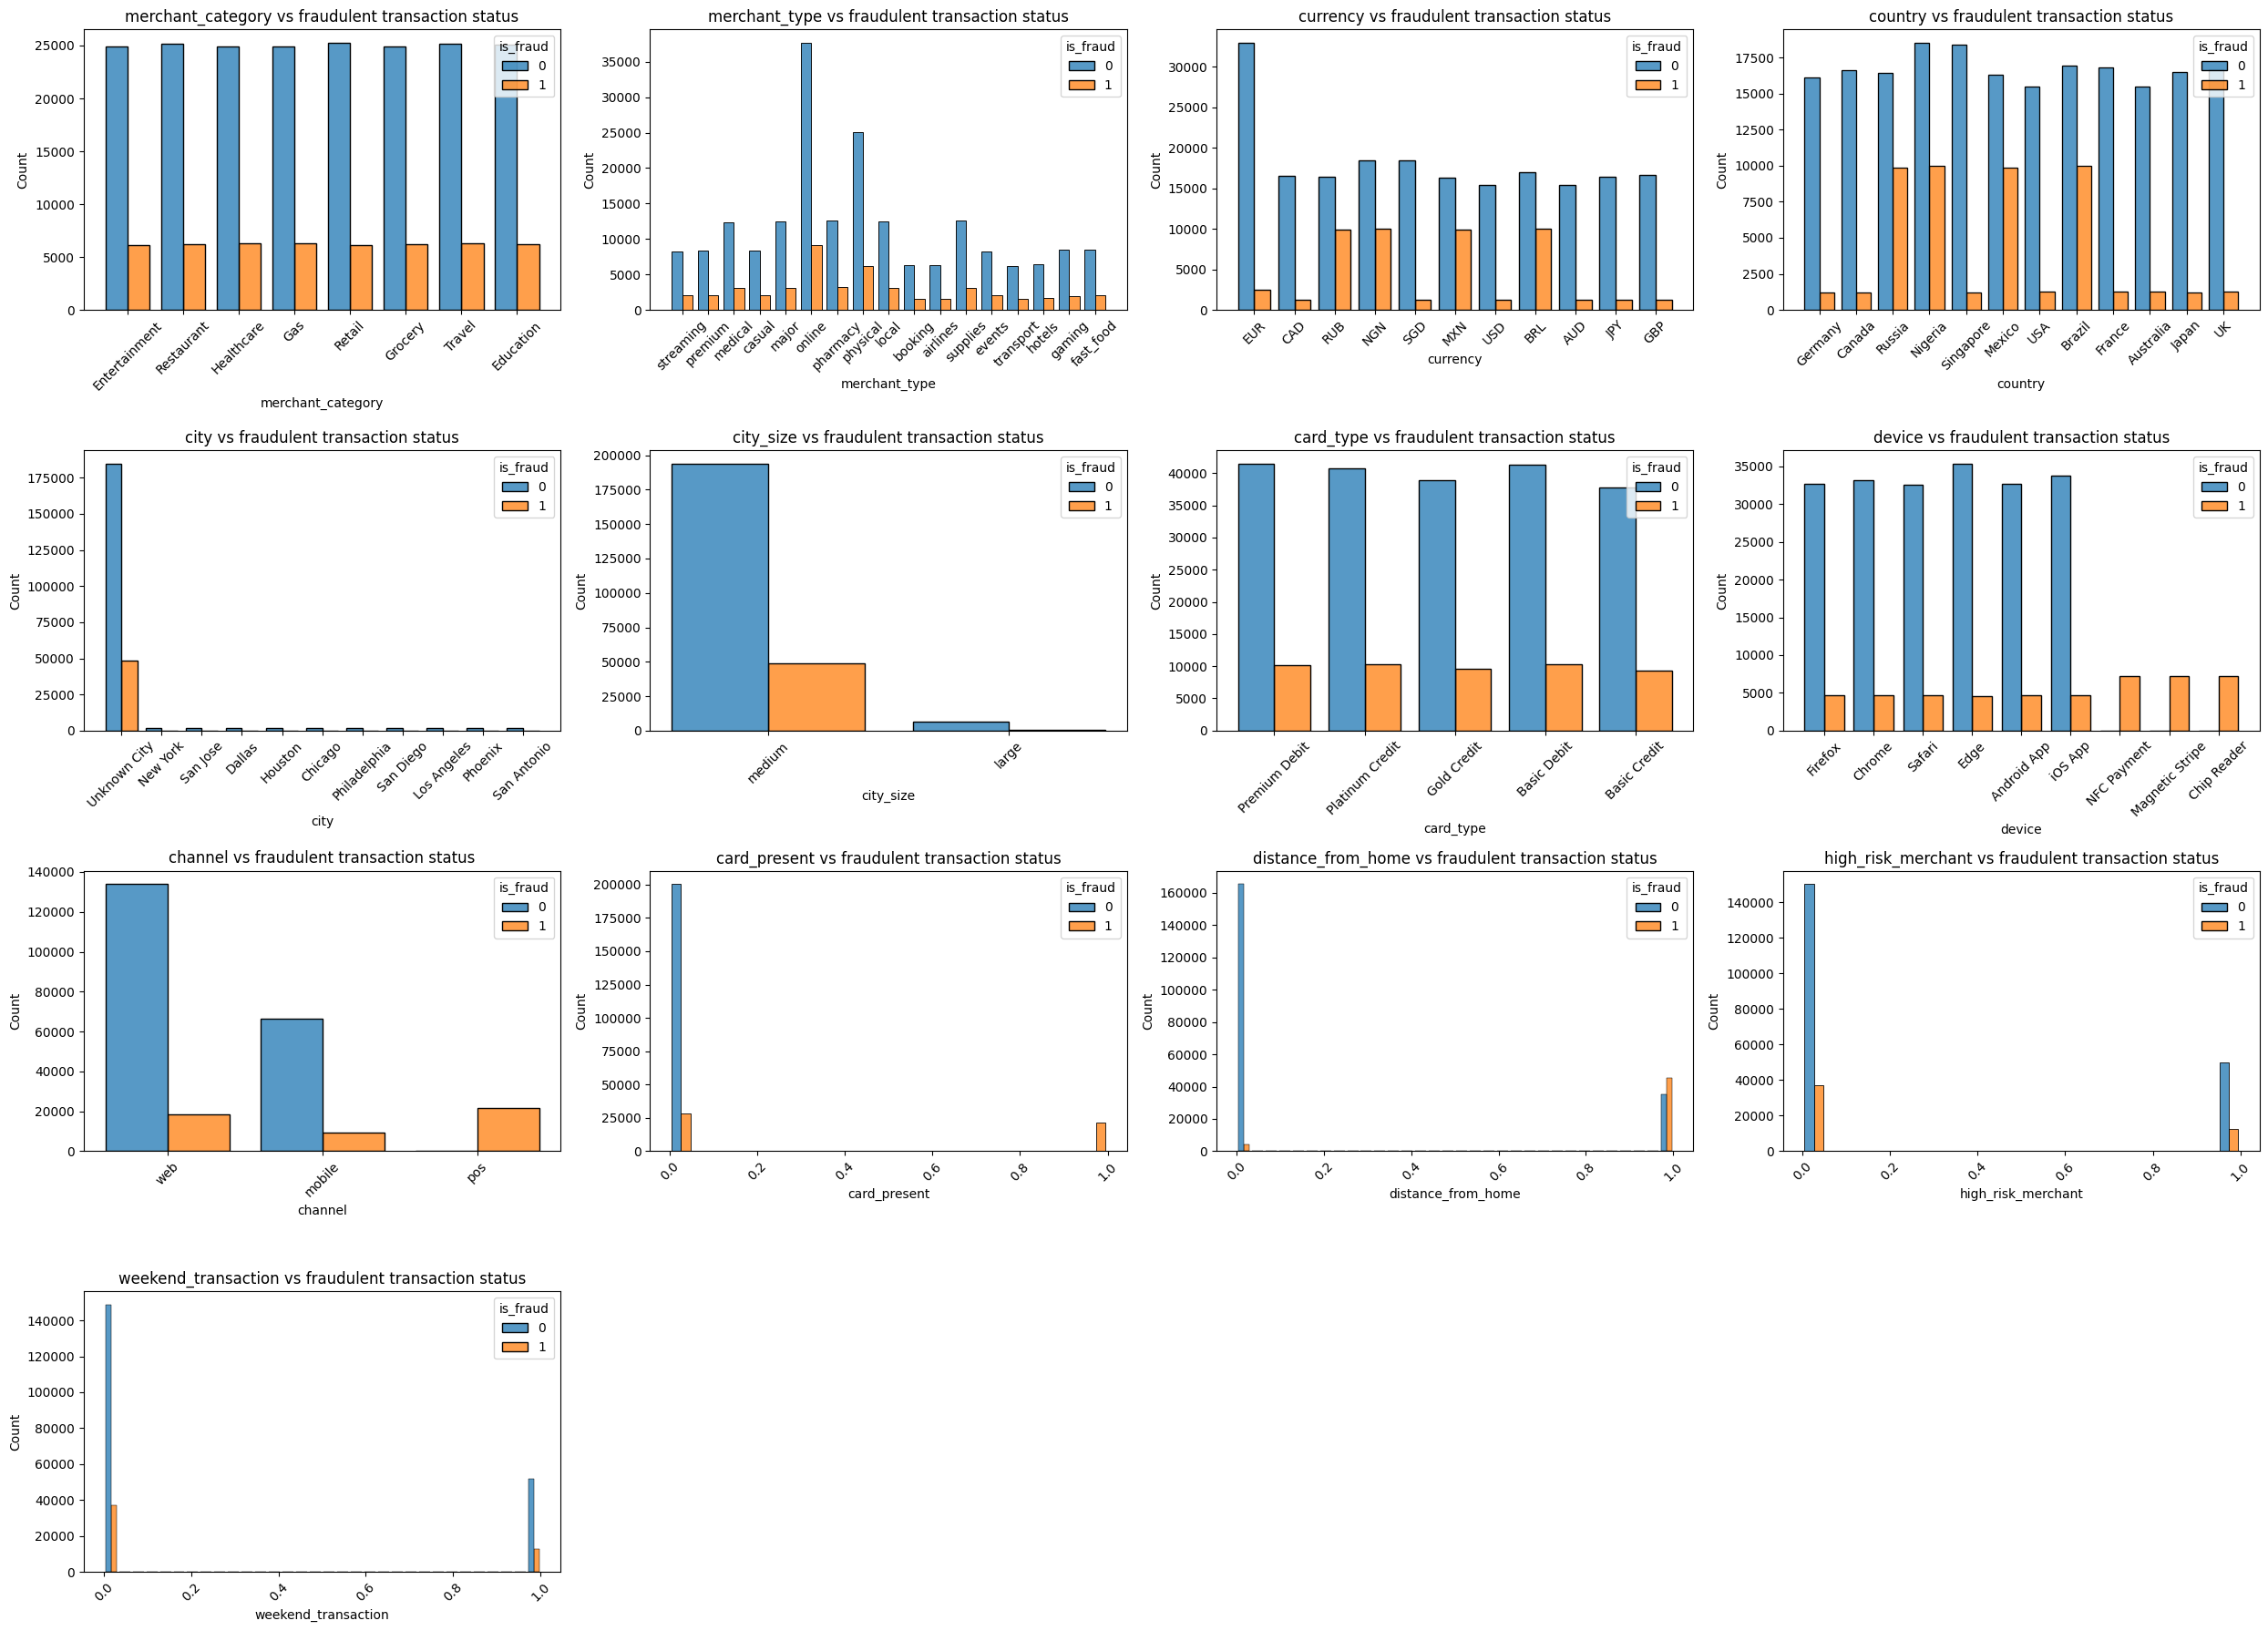

In [29]:
# Adjust the number of rows and columns for subplots
ncol = 4
nrow = len(categorical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(25, 18))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(categorical_cols):
    sns.histplot(data=transaction_sample, x=col, hue = 'is_fraud', multiple = 'dodge', shrink = 0.8, ax=axes[i])
    axes[i].set_title(f'{col} vs fraudulent transaction status')
    axes[i].tick_params(axis = 'x', rotation = 45)
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

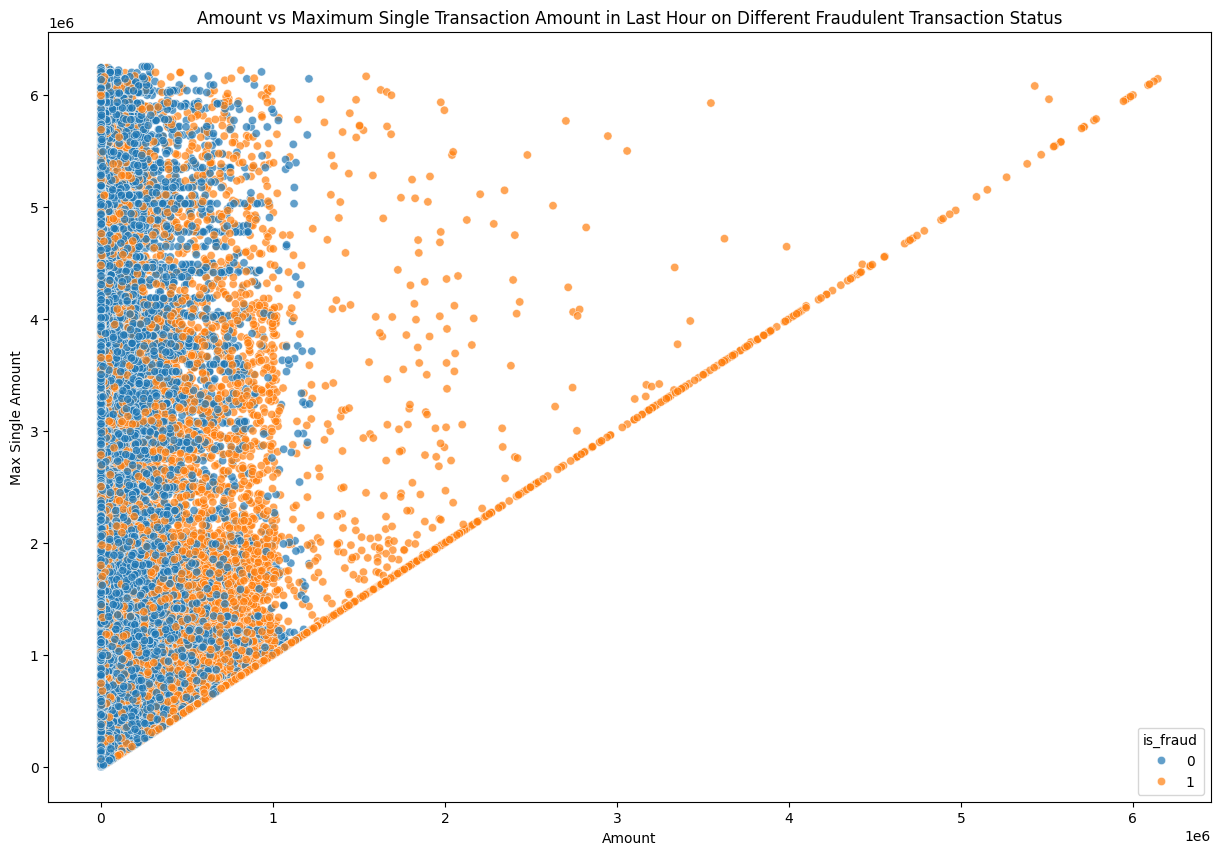

In [30]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=transaction_sample, x='amount', y='max_single_amount', hue='is_fraud', alpha=0.7)
plt.title('Amount vs Maximum Single Transaction Amount in Last Hour on Different Fraudulent Transaction Status')
plt.xlabel('Amount')
plt.ylabel('Max Single Amount')
plt.show()

In [31]:
# Specific exploration on particular countries with higher proportion of fraudulent transactions
country_specific = transaction_sample[transaction_sample['country'].isin(['Russia', 'Nigeria', 'Mexico', 'Brazil'])]
country_vis = country_specific.groupby(['country', 'is_fraud'])['amount'].agg('median').reset_index()
country_vis

,country,is_fraud,amount
0,Brazil,0,2084.780
1,Brazil,1,3811.930
2,Mexico,0,8268.815
3,Mexico,1,14976.800
4,Nigeria,0,174883.120
5,Nigeria,1,294516.610
6,Russia,0,31081.490
7,Russia,1,56978.935


/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/2559008515.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data = country_vis, x = 'country', y = 'amount', hue = 'is_fraud', palette = sns.color_palette("viridis"))


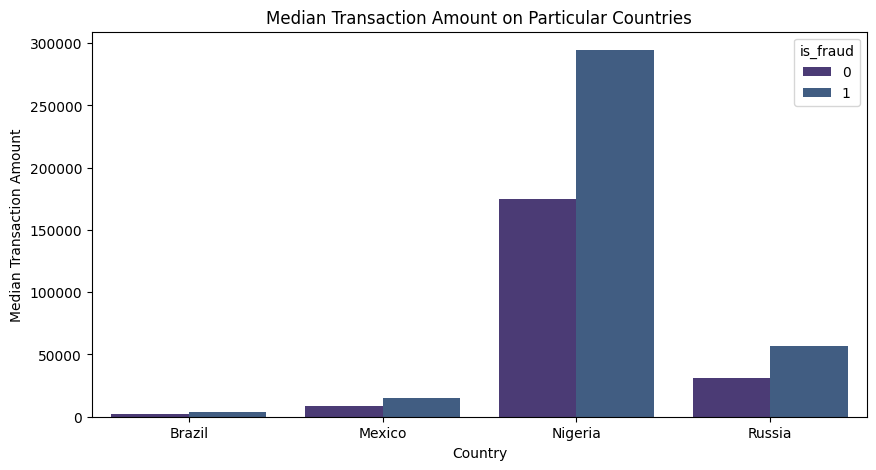

In [32]:
# Amount of Transaction compared among different countries with different fraud status
plt.figure(figsize=(10, 5))
sns.barplot(data = country_vis, x = 'country', y = 'amount', hue = 'is_fraud', palette = sns.color_palette("viridis"))
plt.title('Median Transaction Amount on Particular Countries')
plt.xlabel('Country')
plt.ylabel('Median Transaction Amount')
plt.show()

In [33]:
# Separate all transactions happened at Nigeria which its amount was abnormally high
nigeria_high_amount = transaction_sample[(transaction_sample['country'] == 'Nigeria') & (transaction_sample['amount'] > 294516)]
print(f'number of abnormal transactions at Nigeria : {nigeria_high_amount.shape[0]}')

number of abnormal transactions at Nigeria : 9020


/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/3793081960.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('rocket'), ax = axes[i])
/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/3793081960.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('rocket'), ax = axes[i])


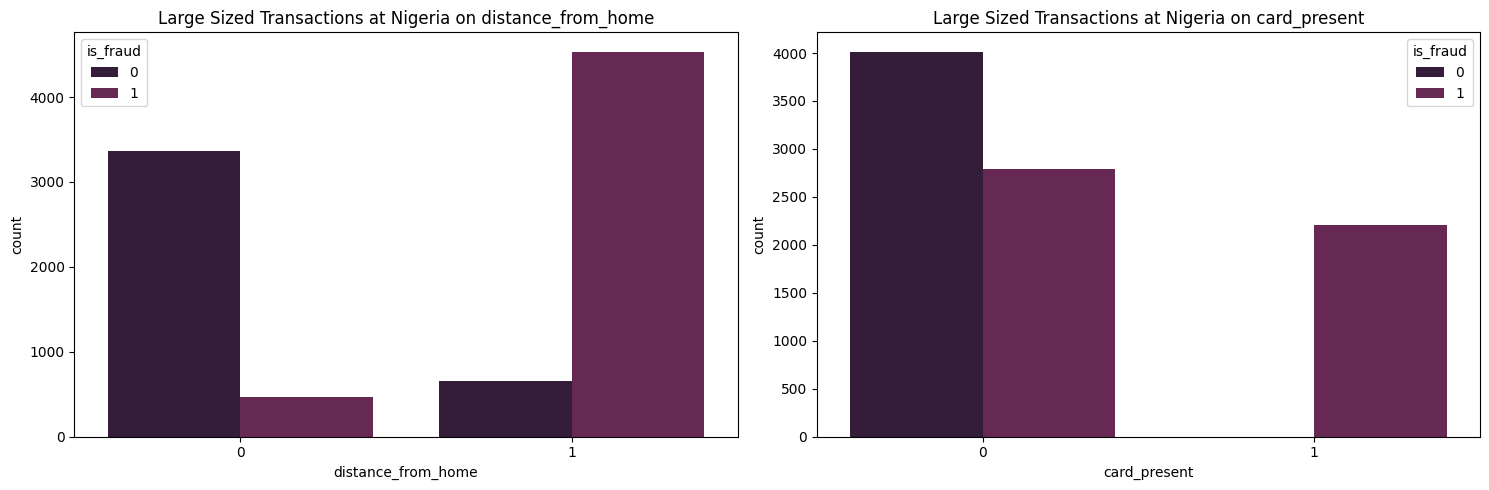

In [34]:
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = nigeria_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('rocket'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Nigeria on {col}')

plt.tight_layout()
plt.show()

number of abnormal transactions at Brazil : 8272


/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/647270184.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('mako'), ax = axes[i])
/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/647270184.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('mako'), ax = axes[i])


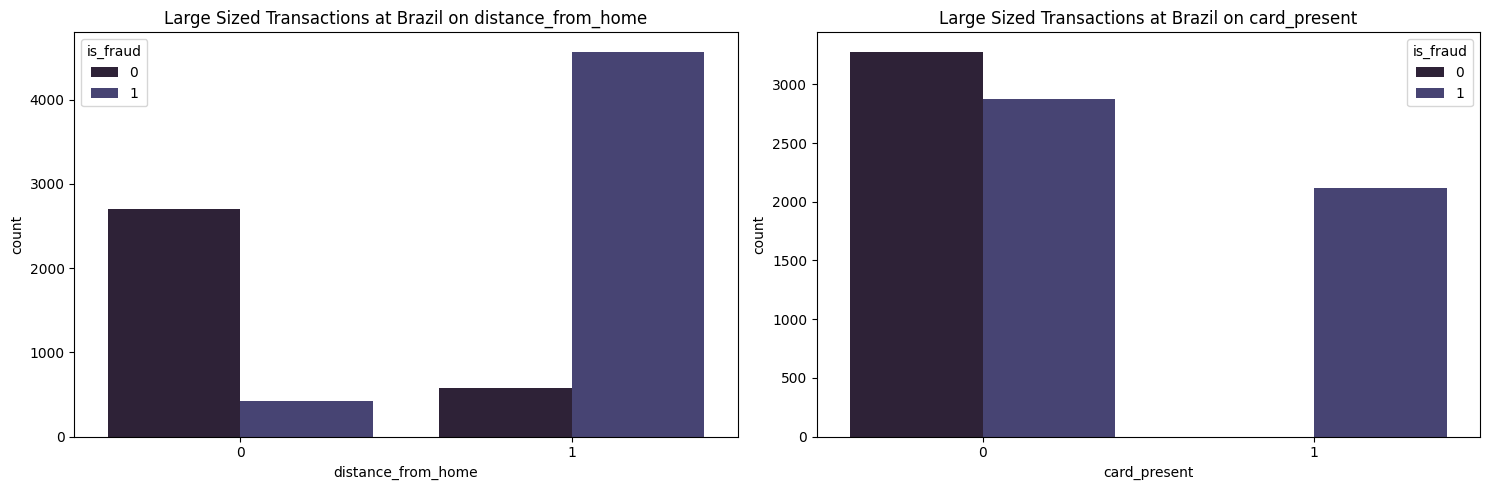

In [35]:
# Perform similar process for Brazil
brazil_high_amount = transaction_sample[(transaction_sample['country'] == 'Brazil') & (transaction_sample['amount'] > 3811)]
print(f'number of abnormal transactions at Brazil : {brazil_high_amount.shape[0]}')
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = brazil_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('mako'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Brazil on {col}')

plt.tight_layout()
plt.show()

number of abnormal transactions at Russia : 8066


/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/893515779.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('crest'), ax = axes[i])
/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/893515779.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('crest'), ax = axes[i])


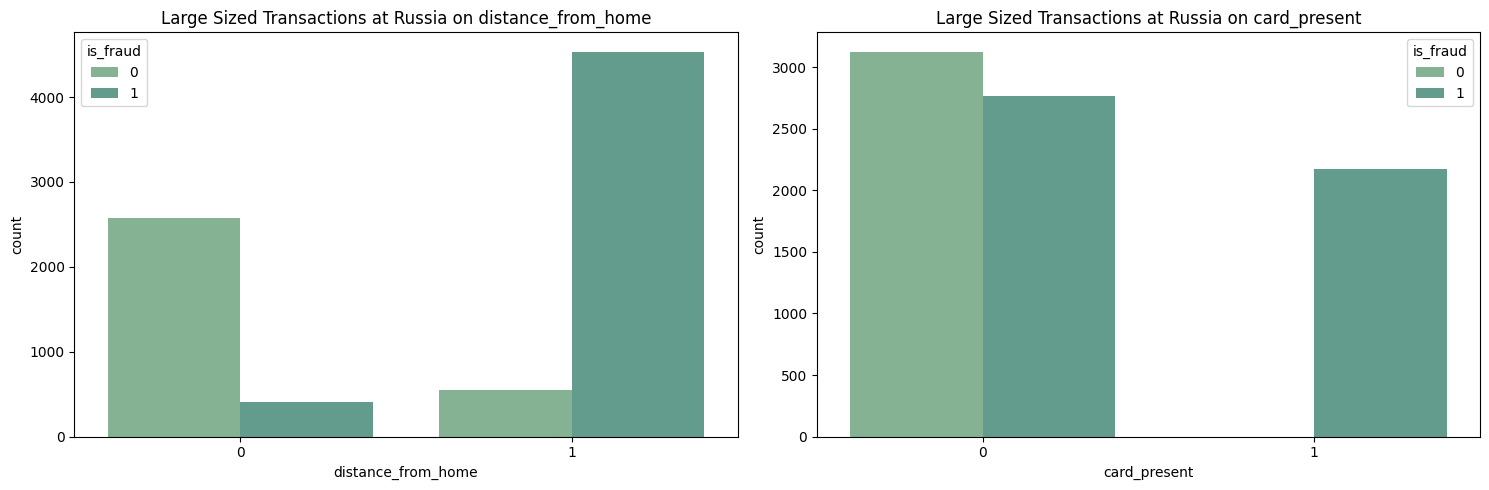

In [36]:
## Perform similar process for Russia
russia_high_amount = transaction_sample[(transaction_sample['country'] == 'Russia') & (transaction_sample['amount'] > 56978)]
print(f'number of abnormal transactions at Russia : {russia_high_amount.shape[0]}')
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = russia_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('crest'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Russia on {col}')

plt.tight_layout()
plt.show()

number of abnormal transactions at Mexico : 8044


/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/2677699116.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('cubehelix'), ax = axes[i])
/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/2677699116.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('cubehelix'), ax = axes[i])


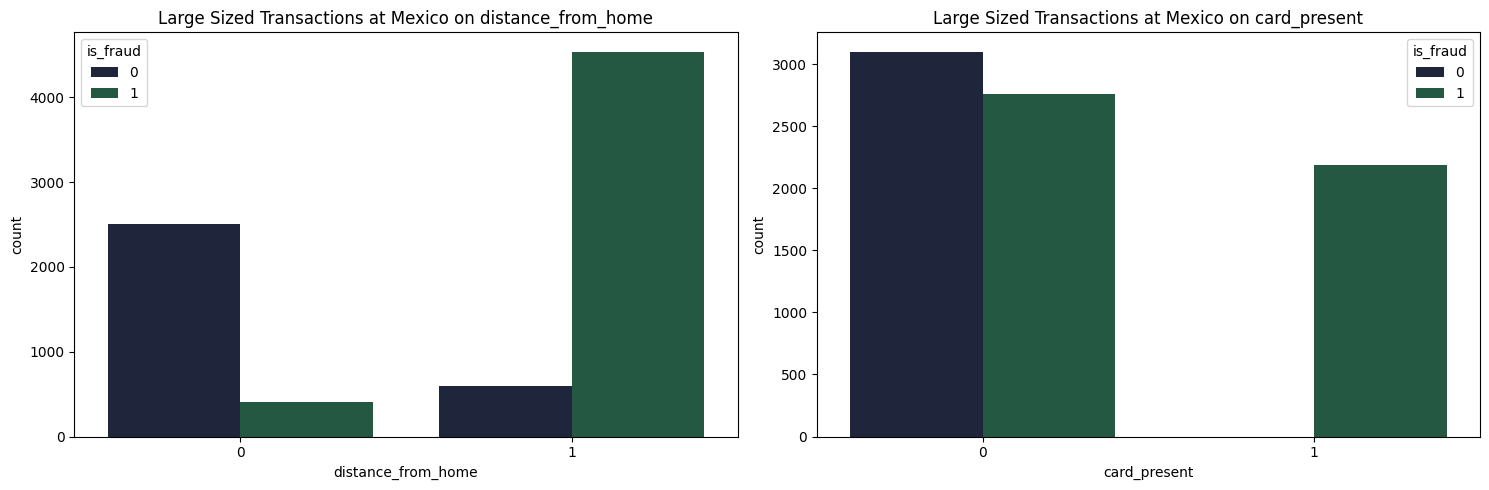

In [37]:
## Perform similar process for Mexico
mexico_high_amount = transaction_sample[(transaction_sample['country'] == 'Mexico') & (transaction_sample['amount'] > 14976)]
print(f'number of abnormal transactions at Mexico : {mexico_high_amount.shape[0]}')
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = mexico_eda = mexico_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('cubehelix'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Mexico on {col}')

plt.tight_layout()
plt.show()

In [38]:
## Exploring median amount of transaction for different devices and different transaction status
tr_amount_device = transaction_sample.groupby(['device', 'is_fraud'])[['amount']].agg('median').reset_index()
tr_amount_device

,device,is_fraud,amount
0,Android App,0,854.830
1,Android App,1,5821.765
2,Chip Reader,1,5649.475
3,Chrome,0,973.010
4,Chrome,1,6116.260
5,Edge,0,858.820
6,Edge,1,4868.610
7,Firefox,0,884.125
8,Firefox,1,6264.610
9,Magnetic Stripe,1,5780.050


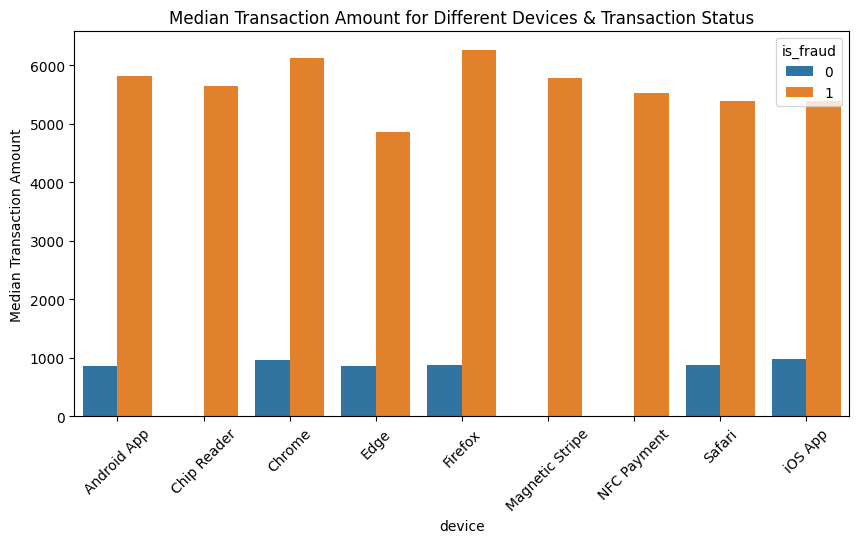

In [39]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.barplot(data = tr_amount_device, x = 'device', y = 'amount', hue = 'is_fraud')
plt.title('Median Transaction Amount for Different Devices & Transaction Status')
plt.ylabel('Median Transaction Amount')
plt.xticks(rotation = 45)
plt.show()

In [40]:
## Exploring Chip Reader, Magnetic Stripe and NFC Payment
weird_device = transaction_sample[transaction_sample['device'].isin(['Chip Reader', 'Magnetic Stripe', 'NFC Payment'])]
weird_device.groupby('device')['is_fraud'].value_counts().reset_index()

,device,is_fraud,count
0,Chip Reader,1,7250
1,Magnetic Stripe,1,7241
2,NFC Payment,1,7173


In [41]:
## Find out median transaction amount on different transaction hours
hour_med_amount = transaction_sample.groupby(['transaction_hour', 'is_fraud'])[['amount']].agg('median').reset_index()
hour_med_amount

,transaction_hour,is_fraud,amount
0,0,0,953.090
1,0,1,4682.370
2,1,0,921.355
3,1,1,6022.055
4,2,0,829.490
5,2,1,5712.715
6,3,0,913.260
7,3,1,5304.825
8,4,0,904.595
9,4,1,6273.145


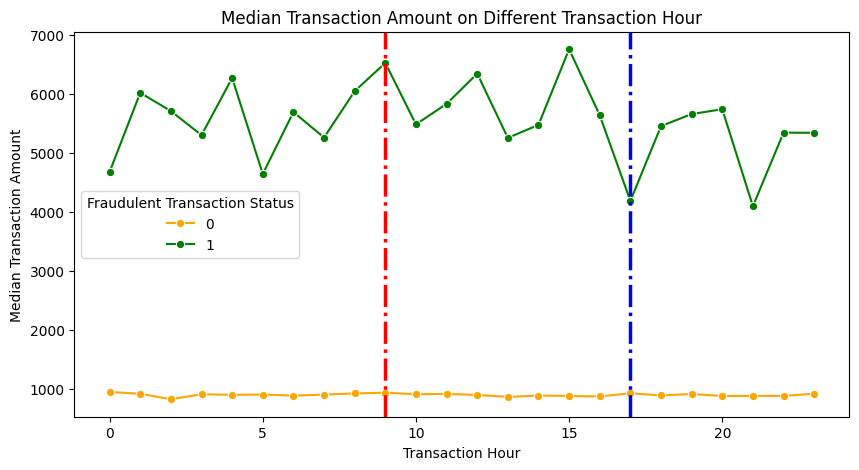

In [42]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.lineplot(data = hour_med_amount, x = 'transaction_hour', y = 'amount', hue = 'is_fraud', linestyle = '-', marker = 'o',
            palette = ['orange', 'green'])
plt.axvline(x = 9, color = 'r', linestyle = '-.', linewidth = 2.5) ## Bank Opening Time
plt.axvline(x = 17, color = 'b', linestyle = '-.', linewidth = 2.5) ## Bank Closing Time
plt.legend(title = 'Fraudulent Transaction Status')
plt.title('Median Transaction Amount on Different Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Median Transaction Amount')
plt.show()

In [43]:
## Find out median transaction frequency on different transaction hours
hour_med_frequency = transaction_sample.groupby(['transaction_hour', 'is_fraud'])[['num_transactions']].agg('median').reset_index()
hour_med_frequency

,transaction_hour,is_fraud,num_transactions
0,0,0,302.0
1,0,1,288.0
2,1,0,316.0
3,1,1,293.0
4,2,0,309.0
5,2,1,313.0
6,3,0,308.0
7,3,1,318.0
8,4,0,299.0
9,4,1,312.0


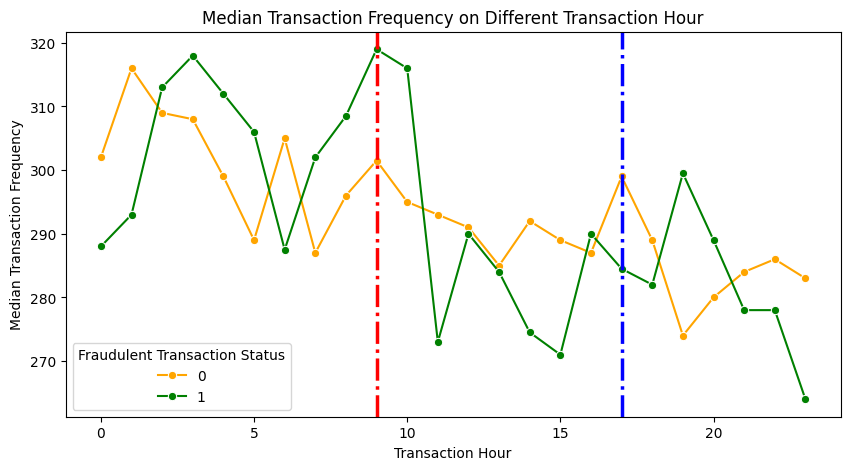

In [44]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.lineplot(data = hour_med_frequency, x = 'transaction_hour', y = 'num_transactions', hue = 'is_fraud', linestyle = '-', marker = 'o',
            palette = ['orange', 'green'])
plt.axvline(x = 9, color = 'r', linestyle = '-.', linewidth = 2.5) ## Bank Opening Time
plt.axvline(x = 17, color = 'b', linestyle = '-.', linewidth = 2.5) ## Bank Closing Time
plt.legend(title = 'Fraudulent Transaction Status')
plt.title('Median Transaction Frequency on Different Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Median Transaction Frequency')
plt.show()

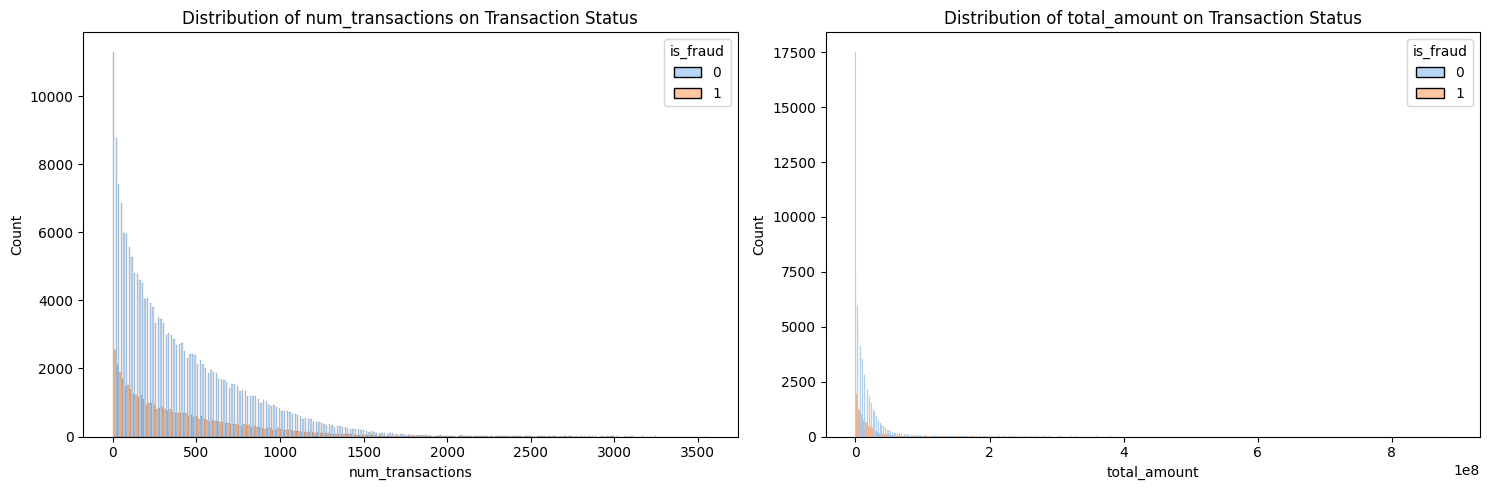

In [45]:
## Compare general distribution of transaction frequencies and total amount spent last hour 
ex_cols = ['num_transactions', 'total_amount']

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(ex_cols):
    sns.histplot(data = transaction_sample, x = col, hue = 'is_fraud', multiple = 'dodge', kde = False, palette = 'pastel', legend = True, 
                 element = 'bars', ax = axes[i])
    axes[i].set_title(f'Distribution of {col} on Transaction Status')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [46]:
# Feature Engineering
transaction_sample.head()

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond
0,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,0,Firefox,web,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495
1,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,0,Chrome,web,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017
2,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,0,Safari,web,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556
3,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,0,Edge,web,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515
4,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,0,Firefox,web,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924


In [47]:
transaction_sample['currency'].unique()

array(['EUR', 'CAD', 'RUB', 'NGN', 'SGD', 'MXN', 'USD', 'BRL', 'AUD',
       'JPY', 'GBP'], dtype=object)

In [48]:
def convert_currency_amt(transaction_sample):
    # Define the conversion rates for each currency
    conversion_rates = {
        'EUR': 1.06,
        'CAD': 0.72,
        'RUB': 0.01,
        'NGN': 0.0006,
        'SGD': 0.75,
        'MXN': 0.049,
        'BRL': 0.17,
        'AUD': 0.65,
        'JPY': 0.0065
    }
    
    # Add a column by mapping the currency to the corresponding conversion rate,
    # defaulting to 1.28 for Great Britain Pound if currency is not in the dictionary
    transaction_sample['USD_converted_amount'] = transaction_sample['amount'] * \
                                                 transaction_sample['currency'].map(conversion_rates).fillna(1.28)
    transaction_sample.drop(['amount', 'currency'], axis = 1, inplace = True)
    return transaction_sample

# Run the function
transaction_sample = convert_currency_amt(transaction_sample)

In [49]:
transaction_sample['USD_converted_amount'].describe()

count    250000.000000
mean        537.578000
std         714.944939
min           0.002424
25%         167.158275
50%         353.857950
75%         621.011600
max       19154.073600
Name: USD_converted_amount, dtype: float64

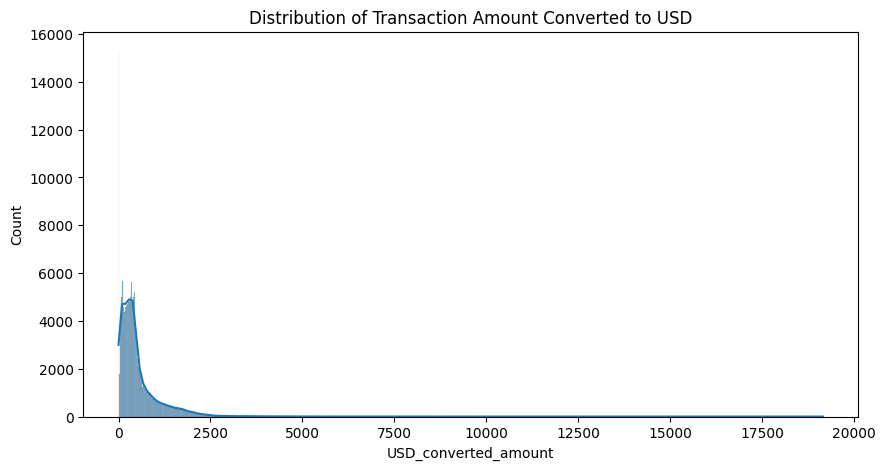

In [50]:
plt.figure(figsize = (10, 5))
sns.histplot(data = transaction_sample, x = 'USD_converted_amount', kde = True)
plt.title('Distribution of Transaction Amount Converted to USD')
plt.show()

In [51]:
## Add a new column indicating whether bank is operating or not
def is_bank_operating(transaction_sample):
    transaction_sample['is_bank_operating'] = np.where(
        transaction_sample['transaction_hour'] < 9, 0,
        np.where(transaction_sample['transaction_hour'] <= 17, 1, 0)
    )
    return transaction_sample

# Apply the function
transaction_sample = is_bank_operating(transaction_sample)

In [52]:
## Check if there are no NA values
transaction_sample.isna().sum()

merchant_category       0
merchant_type           0
merchant                0
country                 0
city                    0
city_size               0
card_type               0
card_present            0
device                  0
channel                 0
distance_from_home      0
high_risk_merchant      0
transaction_hour        0
weekend_transaction     0
is_fraud                0
num_transactions        0
total_amount            0
unique_merchants        0
unique_countries        0
max_single_amount       0
year                    0
month                   0
day                     0
hour                    0
minute                  0
second                  0
microsecond             0
USD_converted_amount    0
is_bank_operating       0
dtype: int64

In [53]:
# Check if any column has duplicating values
transaction_sample.duplicated().sum()

np.int64(0)

In [54]:
transaction_sample['card_type'].unique()

array(['Premium Debit', 'Platinum Credit', 'Gold Credit', 'Basic Debit',
       'Basic Credit'], dtype=object)

In [55]:
## Ordinal Categorical Variable
transaction_sample['card_type'] = transaction_sample['card_type'].map({
    'Premium Debit' : 4, 
    'Platinum Credit' : 3,
    'Gold Credit' : 2,
    'Basic Debit' : 1,
    'Basic Credit' : 0
})

In [56]:
transaction_sample['merchant'].unique()

array(['Spotify', "Ruth's Chris", 'Lab Corp', "Applebee's", 'Chevron',
       'eBay', 'Rite Aid', 'Whole Foods', 'Highway Gas Stop',
       'DuaneReade', 'Mobil', "Macy's", 'Local Gas Station',
       'CVS Pharmacy', 'Hotels.com', 'American Airlines', 'edX',
       'FreshDirect', 'Barnes & Noble', 'Safeway', 'BP', 'AMC Theaters',
       'United Airlines', 'Walmart Grocery', 'Udemy', 'Aldi',
       'Red Lobster', 'Southwest', 'Enterprise Rent-A-Car', 'Hilton',
       'Delta', 'Skillshare', 'Amazon', 'Urgent Care', 'Nobu',
       'Amazon Fresh', 'Walgreens', 'Olive Garden', 'Nintendo eShop',
       'PlayStation Store', 'Etsy', 'University Bookstore', 'Marriott',
       'Subway', 'Netflix', 'Wayfair', 'Epic Games', 'Target', 'Coursera',
       'Local Hospital', 'Instacart', 'JetBlue', 'Sheraton', 'StubHub',
       'Chegg', 'Nike Store', 'IKEA', 'AliExpress', 'Food Lion',
       "Wendy's", 'Xbox Live', 'Apple Music', 'Capital Grille',
       'Ticketmaster', 'Amazon Prime', 'Steam', 'TGI Fr

In [57]:
# Identify top merchants based on frequency or other criteria
top_merchants = transaction_sample['merchant'].value_counts().nlargest(20).index

# Replace merchants not in top_merchants with "Other"
transaction_sample['merchant'] = transaction_sample['merchant'].apply(lambda x: x if x in top_merchants else 'Other')

# One-hot encode
transaction_sample = pd.get_dummies(transaction_sample, columns=['merchant'], prefix='merchant', dtype = 'int')

In [58]:
transaction_sample.head()

,merchant_category,merchant_type,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond,USD_converted_amount,is_bank_operating,merchant_Amazon Fresh,merchant_Barnes & Noble,merchant_CVS Pharmacy,merchant_Chegg,merchant_DuaneReade,merchant_FreshDirect,merchant_Highway Gas Stop,merchant_Instacart,merchant_Lab Corp,merchant_Local Gas Station,merchant_Local Hospital,merchant_MasterClass,merchant_Medical Center,merchant_Other,merchant_Rite Aid,merchant_Truck Stop,merchant_University Bookstore,merchant_Urgent Care,merchant_Walgreens,merchant_Walmart Grocery,merchant_edX
0,Entertainment,streaming,Germany,Unknown City,medium,4,0,Firefox,web,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495,179.532200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Restaurant,premium,Canada,Unknown City,medium,3,0,Chrome,web,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017,593.042400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Entertainment,streaming,Russia,Unknown City,medium,2,0,Safari,web,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556,219.486600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Healthcare,medical,Nigeria,Unknown City,medium,4,0,Edge,web,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515,0.961476,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Restaurant,casual,Singapore,Unknown City,medium,1,0,Firefox,web,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924,67.350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
## Perform One-Hot Encoding on categorical variables
transaction_cleaned = pd.get_dummies(transaction_sample, dtype = 'int')

In [61]:
transaction_cleaned.head()

,card_type,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond,USD_converted_amount,is_bank_operating,merchant_Amazon Fresh,merchant_Barnes & Noble,merchant_CVS Pharmacy,merchant_Chegg,merchant_DuaneReade,merchant_FreshDirect,merchant_Highway Gas Stop,merchant_Instacart,merchant_Lab Corp,merchant_Local Gas Station,merchant_Local Hospital,merchant_MasterClass,merchant_Medical Center,merchant_Other,merchant_Rite Aid,merchant_Truck Stop,merchant_University Bookstore,merchant_Urgent Care,merchant_Walgreens,merchant_Walmart Grocery,merchant_edX,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,merchant_type_airlines,merchant_type_booking,merchant_type_casual,merchant_type_events,merchant_type_fast_food,merchant_type_gaming,merchant_type_hotels,merchant_type_local,merchant_type_major,merchant_type_medical,merchant_type_online,merchant_type_pharmacy,merchant_type_physical,merchant_type_premium,merchant_type_streaming,merchant_type_supplies,merchant_type_transport,country_Australia,country_Brazil,country_Canada,country_France,country_Germany,country_Japan,country_Mexico,country_Nigeria,country_Russia,country_Singapore,country_UK,country_USA,city_Chicago,city_Dallas,city_Houston,city_Los Angeles,city_New York,city_Philadelphia,city_Phoenix,city_San Antonio,city_San Diego,city_San Jose,city_Unknown City,city_size_large,city_size_medium,device_Android App,device_Chip Reader,device_Chrome,device_Edge,device_Firefox,device_Magnetic Stripe,device_NFC Payment,device_Safari,device_iOS App,channel_mobile,channel_pos,channel_web
0,4,0,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495,179.532200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,3,0,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017,593.042400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,2,0,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556,219.486600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,4,0,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515,0.961476,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924,67.350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [62]:
transaction_cleaned.isna().any(axis = 1).sum()

np.int64(0)

In [63]:
transaction_cleaned.duplicated().sum()

np.int64(0)

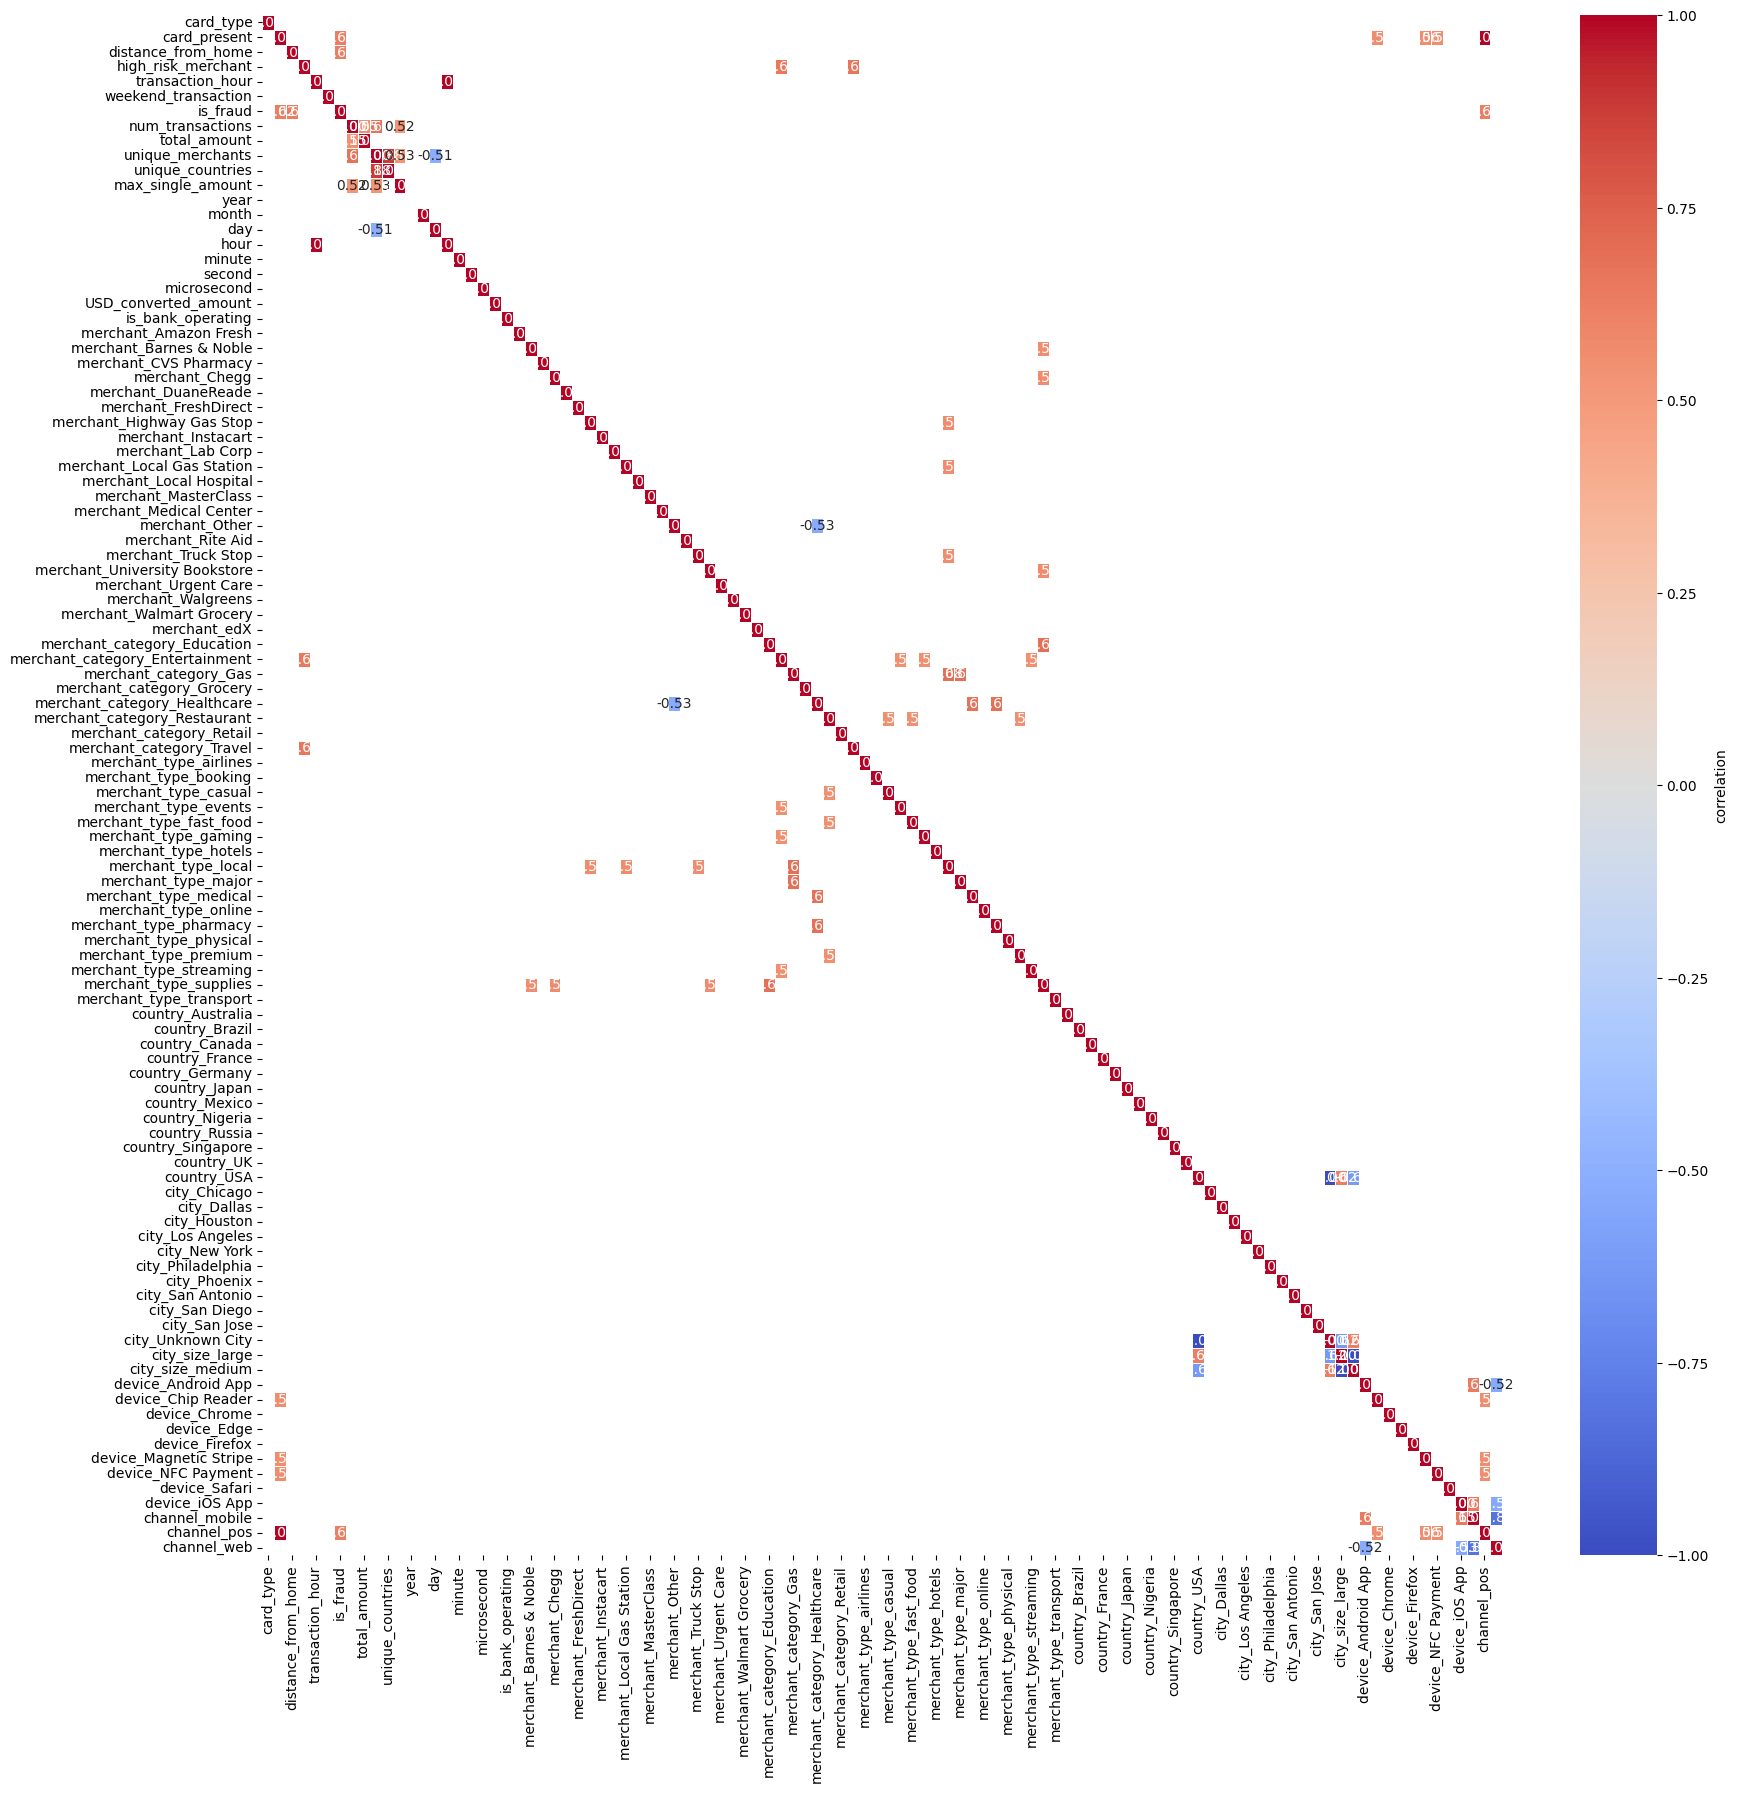

In [64]:
## Heatmap Creation to perform multivariate analysis
transaction_corr = transaction_cleaned.corr()

# Set up a threshold to limit uncorrelated values to be visible
threshold = 0.5

# Filter the possible correlations
filtered_corr = transaction_corr[abs(transaction_corr) >= 0.5]

# Visualisation
plt.figure(figsize = (20, 20))
sns.heatmap(filtered_corr, vmin = -1, vmax = 1, annot = True, fmt = '.2f', linewidth = 0.5, mask = filtered_corr.isnull(), 
           cmap = 'coolwarm', cbar_kws = {'label' : 'correlation'})
plt.show()

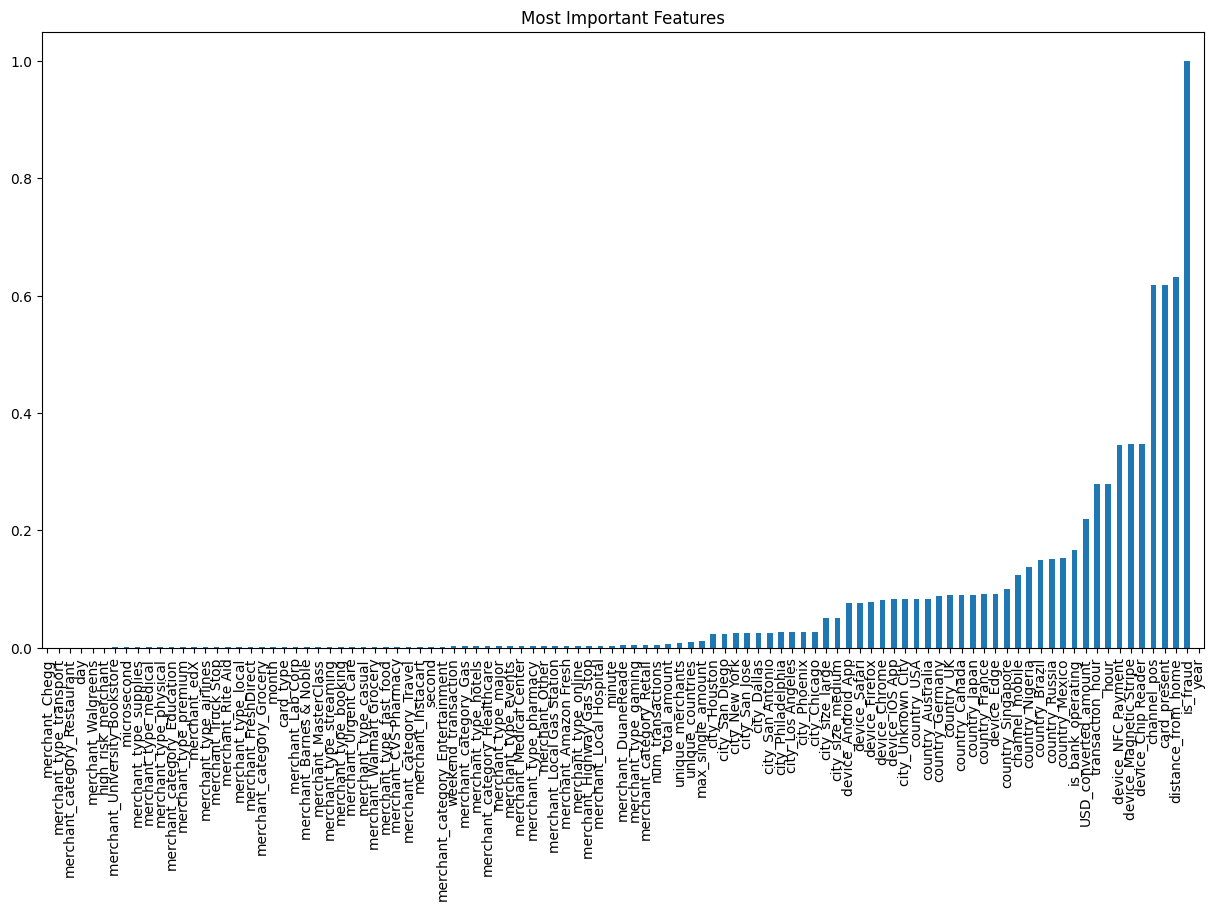

In [65]:
## Select only necessary features with its threshold greater than 0.25
plt.figure(figsize = (15, 8))
transaction_corr['is_fraud'][:-1].abs().sort_values().plot(kind = 'bar', title = 'Most Important Features')
plt.show()

In [66]:
## Select only 20 important features into list
selected_features = transaction_corr['is_fraud'][:-1].abs().sort_values().tail(22)
sel_feature_cols = selected_features.reset_index()['index']
sel_feature_cols

0             country_Canada
1              country_Japan
2             country_France
3                device_Edge
4          country_Singapore
5             channel_mobile
6            country_Nigeria
7             country_Brazil
8             country_Russia
9             country_Mexico
10         is_bank_operating
11      USD_converted_amount
12          transaction_hour
13                      hour
14        device_NFC Payment
15    device_Magnetic Stripe
16        device_Chip Reader
17               channel_pos
18              card_present
19        distance_from_home
20                  is_fraud
21                      year
Name: index, dtype: object

In [68]:
# Training and splitting the data
## Define X & y variable
X = transaction_cleaned[sel_feature_cols]
X.drop(columns = ['is_fraud', 'year'], axis = 1, inplace = True)
y = transaction_cleaned['is_fraud']

# Split X & y into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 97)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200000, 20) (50000, 20) (200000,) (50000,)


/var/folders/s_/0k_dgz917s965l4ps21h8cpm0000gn/T/ipykernel_53510/1184497525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns = ['is_fraud', 'year'], axis = 1, inplace = True)


In [69]:
## Use of SMOTE to upsample the data
ros = RandomOverSampler(random_state = 97)
X_train, y_train = ros.fit_resample(X_train, y_train)
print(f'Percentage of Fraudulent Transaction : {y_train.value_counts(normalize = True)[0] * 100}%')
print(f'Percentage of Normal Transaction : {y_train.value_counts(normalize = True)[1] * 100}%')

Percentage of Fraudulent Transaction : 50.0%
Percentage of Normal Transaction : 50.0%


In [70]:
## Use of MinMaxScaler to Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nClassification Report: \n",classification_report(y_test, y_pred))
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print("AUC:", roc_auc_score(y_test, y_pred))
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print('')
          
    
    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(cm,display_labels= model.classes_)
    disp.plot()
    plt.show()

Evaluation on Random Forest Classifier


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     40066
           1       0.86      0.86      0.86      9934

    accuracy                           0.94     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.94      0.94      0.94     50000

Recall: 0.8570565733843366
AUC: 0.91067025244867
F1-Score: 0.8565823230544796



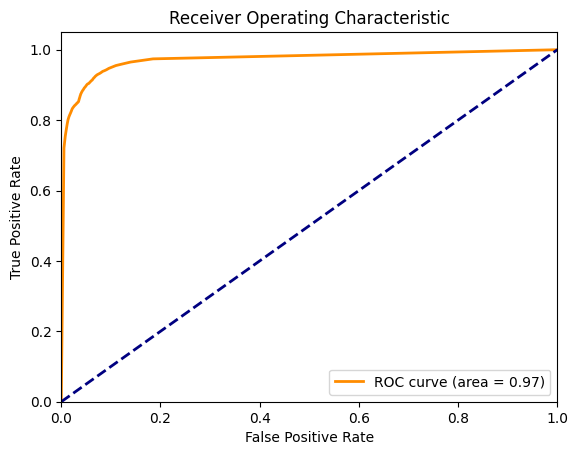

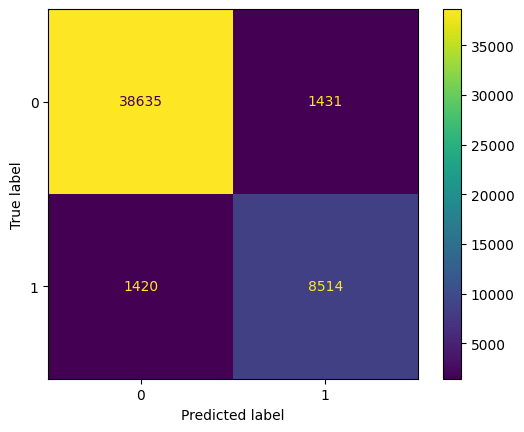

In [72]:
# Initialize and fit Random Forest classifier for anomaly detection
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print(f'Evaluation on Random Forest Classifier\n')
evaluate_model(rf, X_train, X_test, y_train, y_test)

Evaluation on AdaBoost Classifier



/Users/sakshamsharma/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     40066
           1       0.81      0.93      0.87      9934

    accuracy                           0.94     50000
   macro avg       0.90      0.94      0.91     50000
weighted avg       0.95      0.94      0.94     50000

Recall: 0.9333601771693175
AUC: 0.9390881153405116
F1-Score: 0.8658542279497595



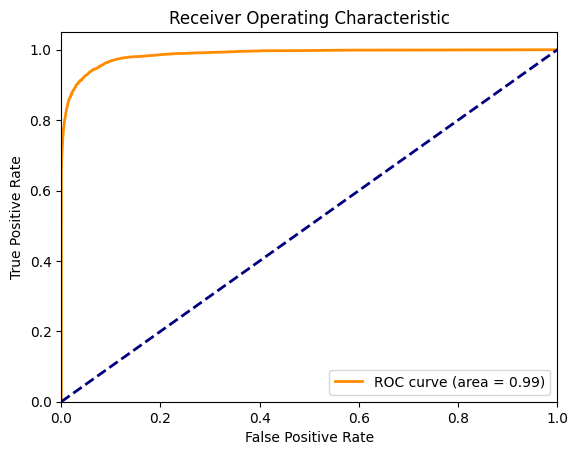

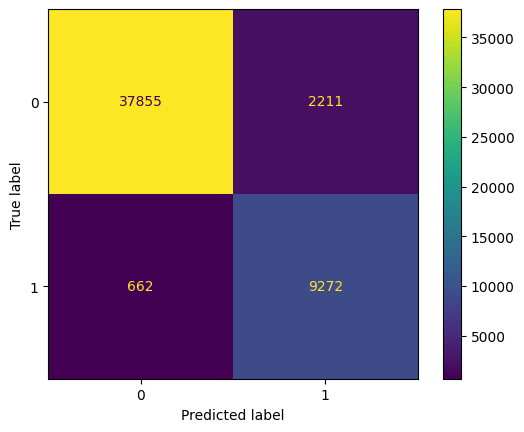

In [73]:
# Initialize and fit AdaBoost classifier for anomaly detection
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

print(f'Evaluation on AdaBoost Classifier\n')
evaluate_model(ada, X_train, X_test, y_train, y_test)

Evaluation on Decision Tree


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     40066
           1       0.85      0.85      0.85      9934

    accuracy                           0.94     50000
   macro avg       0.91      0.90      0.91     50000
weighted avg       0.94      0.94      0.94     50000

Recall: 0.8457821622709886
AUC: 0.90463370580479
F1-Score: 0.8487297338249407



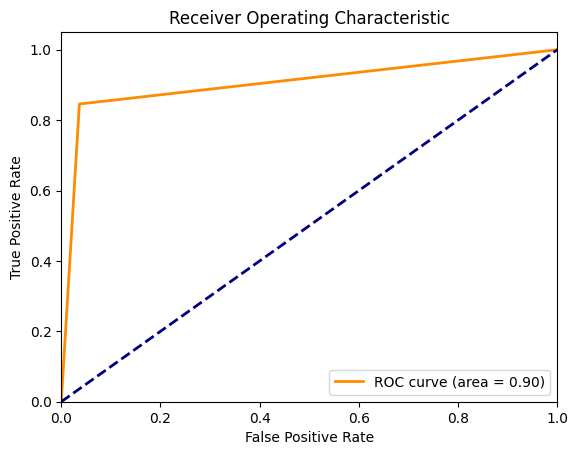

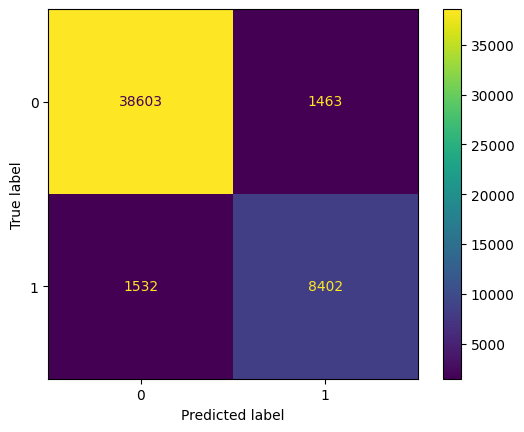

In [74]:
# Initialize and fit Decision Tree classifier for anomaly detection
dt = DecisionTreeClassifier(random_state=42)

print(f'Evaluation on Decision Tree\n')
evaluate_model(dt, X_train, X_test, y_train, y_test)

In [75]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=20))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

/Users/sakshamsharma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/sakshamsharma/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Fit the Neural Network
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 2s 387us/step - accuracy: 0.9059 - loss: 0.2530 - val_accuracy: 0.9187 - val_loss: 0.1977
Epoch 2/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.9194 - loss: 0.2095 - val_accuracy: 0.9193 - val_loss: 0.2041
Epoch 3/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - accuracy: 0.9205 - loss: 0.2058 - val_accuracy: 0.9190 - val_loss: 0.2030
Epoch 4/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.9204 - loss: 0.2035 - val_accuracy: 0.9193 - val_loss: 0.1971
Epoch 5/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step - accuracy: 0.9210 - loss: 0.1983 - val_accuracy: 0.9194 - val_loss: 0.1957
Epoch 6/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.9208 - loss: 0.1957 - val_accuracy: 0.9174 - val_loss: 0.1954
Epoch 7/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.9222 - loss: 0.1890 - val_accuracy: 0.9221 - val_loss: 0.1766
Epoch 8/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 0.9233 -

[]

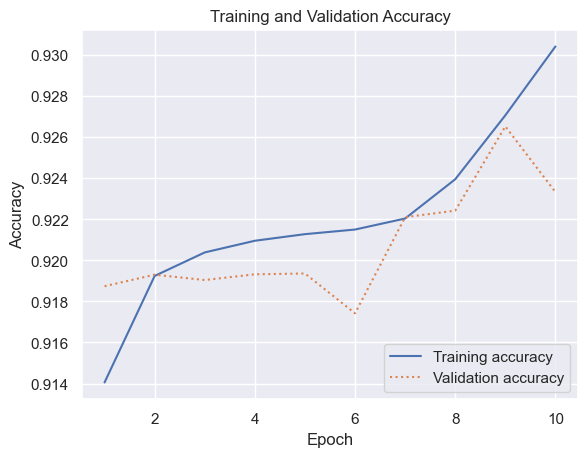

In [77]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


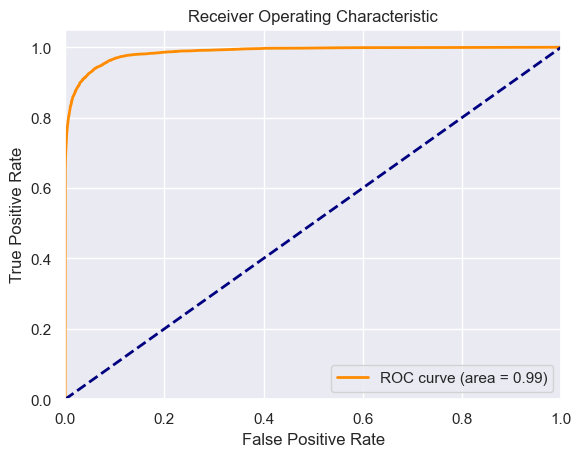

In [ ]:
# ROC Curve 
y_pred_proba = ada.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0 , 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()